# Modélisation d'un choc entre deux fluides

## Inroduction

Nous allons étudier ici le choc de deux fluides dans un tube. Les deux fluides de densités fort différentes sont séparés par une membrane pour $ t < 0 $. A $t = 0$ on enlève la membrane instantanement. Cela a pour effet qu'une vague va se deplacer a travers le tube allant de la zone la plus dense vers la zone la moins dense. 

Le modèle que nous utilisons ici se base sur les équations d'Euler qui lient la vitesse , la pression et la densité. 
\begin{equation}
\frac{\partial }{\partial t} \underline{\mathbf{u}} + \frac{\partial }{\partial x} \underline{\mathbf{f}} = 0
\end{equation}

où $\underline{\mathbf{u}}$ et $\underline{\mathbf{f}}(\underline{\mathbf{u}})$ sont définis ci-dessous.

Pour expliciter cette expression nous devont établir le lien entre les différentes variables : 

\begin{align}
\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u) &= 0 \\
\frac{\partial}{\partial t}(\rho u) + \frac{\partial}{\partial x} (\rho u^2 + p)=0 \\
\frac{\partial}{\partial t}(\rho e_T) + \frac{\partial}{\partial x} (\rho u e_T +p u)=0
\end{align}

Ainsi nous pouvons créer deux vecteurs : $\underline{\mathbf{f}}(\underline{\mathbf{u}})$ représentant le flux et  $\underline{\mathbf{u}}$ qui sont les variables conservées par les équations d'Euler.

\begin{equation}
\underline{\mathbf{u}} =
\left[ \begin{array}{c}
u_1\\
u_2\\
u_3\\ \end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ \end{array} \right]
\end{equation}

\begin{equation}
\underline{\mathbf{f}} = 
\left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u\\ \end{array}
\right] =
\left[ \begin{array}{c}
u_2 \\
\frac{u_2^2}{u_1}+(\gamma-1)\left(u_3-\frac{1}{2}\frac{u_2^2}{u_1}\right) \\
\left[u_3+(\gamma-1)\left(u_2-\frac{1}{2}\frac{u_2^2}{u_1}\right)\right]\frac{u_2}{u_1}\\ \end{array}
\right]
\end{equation}

Ce qui donne finalement cette équation que nous allons résoudre :
\begin{equation}
\frac{\partial}{\partial t}
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]
+ \frac{\partial}{\partial x}
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u\\ \end{array}
\right]
=0
\end{equation}


##  Discrétisation

Pour résoudre le problème nous allos utilisé la méthode de Richmyer. Cette méthode est en deux étapes. On calcule tout d'abord $\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}$,terme predictif et ensuite $\underline{\mathbf{u}}^{n+1}_i $, terme correcteur, selon les équations suivantes : (prediction au milieu de l'intervalle)

\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \underline{\mathbf{u}}^n_{i+1} + \underline{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \underline{\mathbf{f}}^n_{i+1} - \underline{\mathbf{f}}^n_i\right) \\
\underline{\mathbf{u}}^{n+1}_i &= \underline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \underline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}
avec le flux qui est calulé comme suit: 
\begin{equation}
\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \underline{\mathbf{f}}\left(\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right)
\end{equation}
Ce schéma en deux étapes peut se résumer comme suit: le terme prédictif va calculer le flux au milieu de l'intervalle, $ n + \frac{1}{2}$ afin de donner une première idée de la variation de la solution sur l'intervale $[n,n+1]$ . Ensuite, le deuxième terme se base sur l'information que donne le terme prédictif et le terme en $n$ pour calculer la valeur en $n+1$. Ce n'est pas la seule méthode en deux étapes que l'on a vu dans ce module. En effet nous connaisons aussi la méthode de MacCormack. L'avantage de la méthode de Richtmyer est que le terme correcteur se base sur la conservation du flux sur un volume (méthode des volumes finis). Ce qui permet de limiter les erreurs de diffusions numériques dû à des pertes de matière. 

Un autre avantage de cette méthode est sa stabibilité pour la condition CFL, $\sigma$, aussi bien pour des ondes se propageant vers la droite ou vers la gauche. Prouvons le : 
Tour d'abord on pose que $c=\frac{\partial \underline{\mathbf{f}}} {\partial \underline{\mathbf{u}}}$ où $c$ est une constante (le cas non constant pouvant être prouvé de manière analogue) et que l'on a une équation linéaire et ainsi que  $\underline{\mathbf{u}}_i^n=\underline{\mathbf{u}}^n e^{ikx_j}$. On remplace dans l'équation et on obtient:(advection lineaire)

\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}} e^{ik(x_j+\Delta x)} &= \frac{1}{2}\left(\underline{\mathbf{u}}^n e^{ik(x_j +\Delta x)} + \underline{\mathbf{u}}^n e^{ikx_j}\right) -\frac{\Delta t}{2\Delta x} c \left(\underline{\mathbf{u}}^n e^{ik(x_j + \Delta x)} - \underline{\mathbf{u}}^n e^{ikx_j}\right)\\
\Rightarrow \underline{\mathbf{u}}^{n+\frac{1}{2}} e^{ik \Delta x} &= \underline{\mathbf{u}}^n \left(\frac{e^{ik\Delta x}+1}{2}-\frac{\Delta t}{2\Delta x} c (e^{ik\Delta x} -1)\right)\\
\Rightarrow \underline{\mathbf{u}}^{n+\frac{1}{2}} &= \underline{\mathbf{u}}^n \left(e^{-ik\Delta x /2} \frac{e^{ik\Delta x} + 1}{2}-\frac{\Delta t}{2\Delta x} c e^{-ik\Delta x /2}(e^{ik\Delta x} -1)\right)\\
\Rightarrow \underline{\mathbf{u}}^{n+\frac{1}{2}} &= \underline{\mathbf{u}}^n \left(\frac{e^{ik\Delta x /2} + e^{-ik\Delta x/2}}{2} -\frac{\Delta t}{\Delta x} c \frac{e^{ik\Delta x/2} -e^{-ik\Delta x/2}}{2}\right)
\end{align}
En utilisant les propriétés des exponnentielles imaginaires qui définissent les fonctions périodiques, $\sin$ et $\cos$, on a cette expression: 
\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}} &= \underline{\mathbf{u}}^n \left(\cos(k\Delta x/2) -ic \frac{\Delta t}{\Delta x} \sin(k \Delta x/2)\right)
\end{align}

Comme ceci est valable pour n'importe quel $n$, on obient ainsi cette formule : 

\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}} &= \underline{\mathbf{u}}^0 \left(\cos(k\Delta x/2) -ic \frac{\Delta t}{\Delta x} \sin(k \Delta x/2)\right)^n
\end{align}

Pour que la solution soit stable, il faut nécessaire que le coefficent multiplicatif soit inférieur ou égal à 1 pour éviter que la solution explose après un certain nomre d'itération. Mathématiquement, on a cette condition :$ \lvert \cos (k \Delta x/2) -ic \frac{\Delta t}{\Delta x} sin(k\Delta x/2)\lvert ^ 2 \leq 1$. 
\begin{align}
\Rightarrow c^2 \frac{\Delta t^2}{\Delta x^2}\sin^2(k \Delta x/2) &\leq 1-\cos^2(k\Delta x/2)=\sin^2(k \Delta x/2)\\
\Rightarrow c^2 \frac{\Delta t^2}{\Delta x^2}&\leq 1 \Leftrightarrow \lvert c \frac{\Delta t}{\Delta x} \rvert \leq 1
\end{align}
Notons que l'on a travaillé que sur le terme prédictif car si on a stabilité sur le terme prédictif, alors on a stabilité sur le terme correcteur, c'est pour cela que l'on ne le fait que pour ce terme. 
On voit que pour ce problème on peut avoir une onde se propageant vers la doite et quelque instants après se propageant vers la gauche ce qu nécessite bien la stabilité pour les deux sens de propagation. 

## Résolution numérique

Passons à la résolution numérique:

Tout d'abord importons les librairies nécessaires à la résolution du problème. 

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline


Ensuite nous avons créer une fonctions qui permet de caluler les conditions initiales. Elle prends en valeurs $\gamma$, coefficient physique propre au fluide en question, le nombre de point de discrétisation ainsi que les conditions initiales à gauche, $\underline{IC}_L $ et à droite $\underline{IC}_R$  : 
\begin{equation}
\underline{IC}_L = \left[ \begin{array}{c} \rho_L \\ u_L \\ p_L  \end{array}\right] = \left[ \begin{array}{c} 1\ kg/m^3 \\ 0\ m/s \\ 100\ kN/m^2 \\ \end{array}\right]
\end{equation}
\begin{equation}
\underline{IC}_R = \left[ \begin{array}{c}  \rho_R \\ u_R \\ p_R  \end{array}\right] = \left[ \begin{array}{c} 0.125\ kg/m^3 \\ 0\ m/s \\ 10\ kN/m^2 \\ \end{array}\right]
\end{equation}

In [2]:
def ComputeInitialCondition(ICL,ICR,gamma,nx,L):
    L = int(L/2)
    x=np.linspace(-L,L,nx)
    uin = np.zeros((3,nx))
    lbound=np.where(x<0)
    rbound=np.where(x>=0)
    uin[0,lbound]=ICL[0]
    uin[1,lbound]=ICL[0]*ICL[1]
    uin[2,lbound]=ICL[2]/(gamma-1)+0.5*ICL[0]*ICL[1]*ICL[1]
    uin[0,rbound]=ICR[0]
    uin[1,rbound]=ICR[0]*ICR[1]
    uin[2,rbound]=ICR[2]/(gamma-1)+0.5*ICR[0]*ICR[1]*ICL[1]
    return uin

Ensuite nous avons crée une fonction qui permet de calculer le flux. Cette fonction est appelée deux fois à chaque itération tout d'abord pour caluler $\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}$ et ensuite $\underline{\mathbf{u}}^{n+1}_i $.

In [3]:
def computeF(u,gamma):
    F=np.zeros_like(u)
    F[0,:]=u[1,:]
    F[1,:]=u[1,:]*u[1,:]/u[0,:]+(gamma-1)*(u[2,:]-0.5*u[1,:]*u[1,:]/u[0,:])
    F[2,:]=(u[2,:]+(gamma-1)*(u[2,:]-0.5*u[1,:]*u[1,:]/u[0,:]))*u[1,:]/u[0,:]
    
    return F

Finalement nous avons la fonction qui calcule la solution selon la méthode de Richtmyer. 

In [4]:

def SodsShock(uin,tf,gamma,dt,nx,dx):
    #calcul de point selon l'axe temporel
    nt = int(tf/dt +1)
    #initialisation des variables
    u = np.zeros((3,nx))
    un = np.zeros((3,nx))
    unplus = np.zeros((3,nx))
    Utot = np.zeros((nt,3,nx))

    #Calcul des conditions initiales
    u = uin
    Utot[0]=u
    
    for i in range (1,nt):
        #calcul du terme predictif
        F1_2=computeF(u,gamma)
        unplus[:,:-1]  = (u[:,1:]+u[:,:-1])/2-dt/(2*dx)*(F1_2[:,1:]-F1_2[:,:-1])
        unplus[:,-1]=u[:,-1]
        F=computeF(unplus,gamma)
        #calcul du terme correcteur
        un[:,1:-1]=u[:,1:-1]-dt/dx*(F[:,1:-1]-F[:,:-2])
        #addition des conditions aux bords
        un[:,0] = u[:,0]
        un[:,-1] = u[:,-1]
        u = copy.deepcopy(un)
        Utot[i]=copy.deepcopy(u)
        
    return Utot


# Résultats et interprétation


Maintenant appliquons notre code au cas du problème :


In [5]:
nx = 81
dx = .25
dt = .0002
tf = 0.01
L = 20
gamma = 1.4
ICL=np.array([1,0,100000])
ICR=np.array([0.125,0,10000])
u = ComputeInitialCondition(ICL,ICR,gamma,nx,L)
Utot = SodsShock(u,tf,gamma,dt,nx,dx) 
def V(U):
    nt = len(U)
    nx = len(U[0][1])
    v = U[:,1,:]/U[:,0,:]
    return v

def P(U,gamma):
    nt = len(U)
    nx = len(U[0][1])
    p= (gamma-1)*(U[:,2,:]-0.5*U[:,1,:]*U[:,1,:]/U[:,0,:])
    return p

X_25 = int(12.5/0.25)
nt = int(tf/dt) +1
rho=Utot[:,0,:]
v=V(Utot)
p=P(Utot,gamma)
print("Pour x = 2.5 m "'\n' "La densité vaut ",rho[nt-1,X_25],"kg/m³"'\n'"La vitesse vaut=",v[nt-1,X_25],"m/s"'\n'"La pression vaut ",p[nt-1,X_25],"Pa")

Pour x = 2.5 m 
La densité vaut  0.374691402648 kg/m³
La vitesse vaut= 292.611471527 m/s
La pression vaut  30250.8901676 Pa


Ceci nous donne les mêmes réponses que sur le site. Comparons maintenant les solution analytiques avec les solutions numériques utilisant la méthode décrite précédement pour t = 0.01 s:

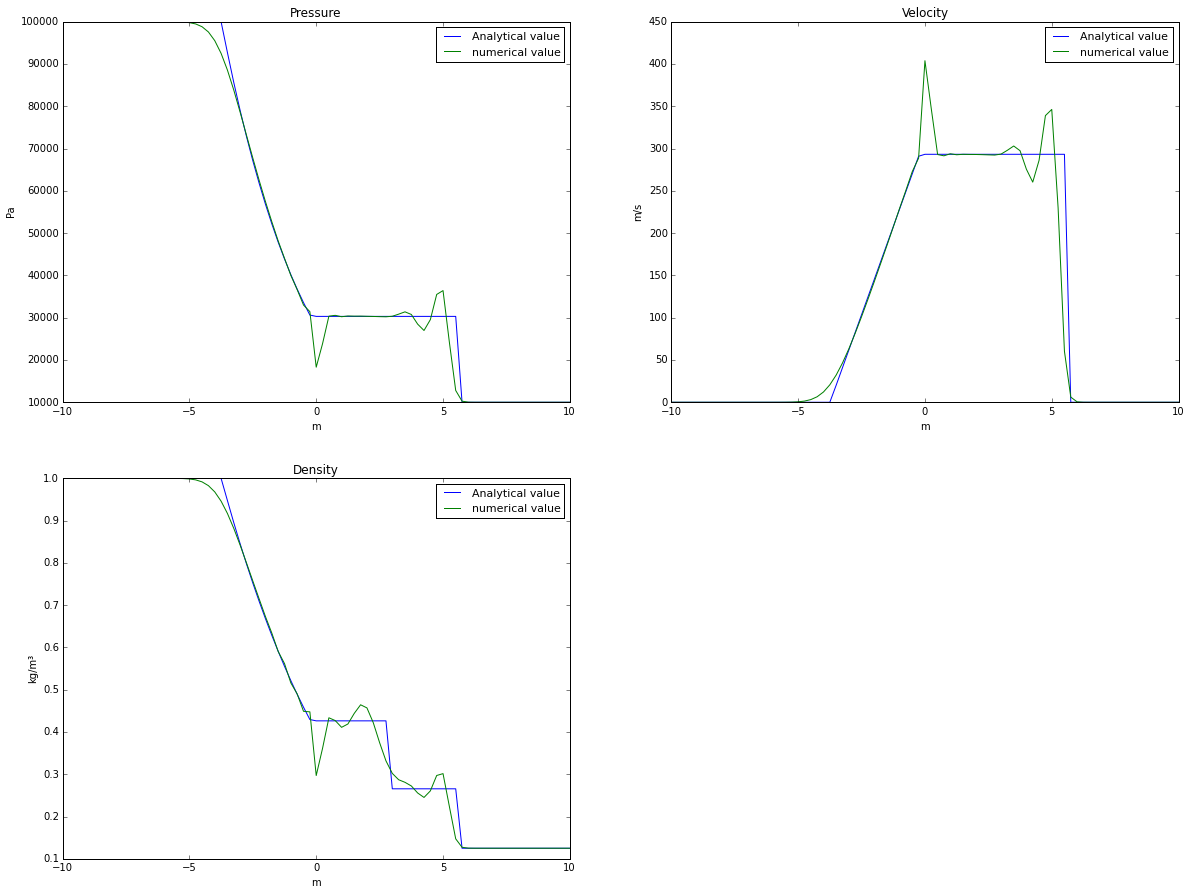

In [6]:


x = x=np.linspace(-10,10,nx)
P_rieman = [ 100000.,100000.,100000.,100000.,100000.,100000.,100000.,100000.,100000.,100000.,100000.,100000., 100000.,100000.,100000.,100000.,100000.,100000.,100000. ,100000.,100000. , 100000.,100000., 100000.,100000.,100000., 92704.01463701,85641.11502937,79044.56171162,72888.40725447  , 67147.8722928  ,  61799.30563663  , 56820.14530084, 52188.88044275  , 47885.01419702 ,  43889.02739715  , 40182.34317275,36747.29241201  ,33567.08007864  , 30625.75237251  , 30313.01732361, 30313.01732361 ,  30313.01732361  , 30313.01732361  , 30313.01732361,  30313.01732361  , 30313.01732361  , 30313.01732361 , 30313.01732361,30313.01732361 , 30313.01732361,30313.01732361,30313.01732361, 30313.01732361 , 30313.01732361,30313.01732361,30313.01732361,30313.01732361 , 30313.01732361,30313.01732361,30313.01732361, 30313.01732361,30313.01732361,10000.,10000.,10000.,10000.,10000.,10000.,10000.,10000.,10000.,10000.,10000.,10000. ,10000.,10000.,10000.,10000.,10000.,10000.]
Rho_rieman =[ 1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,0.94732491,  0.89519148, 0.84537894 , 0.79780894, 0.75240489, 0.70909197,0.6677971,0.62844892,0.59097779,0.55531572,0.52139642,0.4891552 ,0.45852903, 0.42945644,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.125 ,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125 ,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]
V_rieman = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0. , 0.,0. ,0.,0.,0.,0.,0.,0. ,0., 20.13811556 ,40.9714489,61.80478223,82.63811556 ,103.4714489,124.30478223 , 145.13811556 , 165.9714489,186.80478223 , 207.63811556 , 228.4714489  , 249.30478223 , 270.13811556,290.9714489 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538,293.28626538 , 293.28626538 , 293.28626538 , 293.28626538, 293.28626538,293.28626538 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538,293.28626538,293.28626538 ,293.28626538,293.28626538,293.28626538,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
plt.figure(figsize=(20,15))
plt.subplot(221)
plt.plot(x, P_rieman)
plt.plot(x, p[nt-1,:])
plt.legend(["Analytical value","numerical value"],fontsize=11,loc=1)
plt.xlabel("m")
plt.ylabel("Pa")
plt.title('Pressure')
plt.subplot(222)
plt.plot(x, V_rieman)
plt.plot(x, v[nt-1,:])
plt.legend(["Analytical value","numerical value"],fontsize=11,loc=1)
plt.xlabel("m")
plt.ylabel("m/s")
plt.title('Velocity')
plt.subplot(223)
plt.plot(x, Rho_rieman)
plt.plot(x, rho[nt-1,:])
plt.legend(["Analytical value","numerical value"],fontsize=11,loc=1)
plt.xlabel("m")
plt.ylabel("kg/m³")
plt.title('Density')

plt.show()

On voit bien apparaitre les oscillations que l'on avait annoncé dans l'analyse de la stabilité. En effet ces oscillations sont obtenues pour toutes les méthodes du second ordre pour les cas où l'on a un échelon comme condition initiale. Ceci est lié au _phénomène de Gibbs_. Ce phénomène est l'apparition d'un signal périodique autour des point de discontinuité lorsque l'on le décompose en série de Fourier. Apparamment, cette méthode est sensible à ce phénomène.




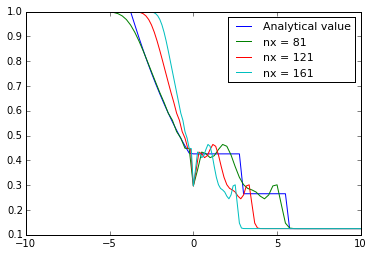

In [7]:
nx1 = 121
nx2 = 161
l = int(L/2)
u = ComputeInitialCondition(ICL,ICR,gamma,nx1,L)
Utot1 = SodsShock(u,tf,gamma,dt,nx1,dx) 
rho1= Utot1[:,0,:]
u = ComputeInitialCondition(ICL,ICR,gamma,nx2,L)
Utot2 = SodsShock(u,tf,gamma,dt,nx2,dx) 
rho2 = Utot2[:,0,:]
x = np.linspace(-l,l,81)
x1=np.linspace(-l,l,nx1)
x2=np.linspace(-l,l,nx2)
plt.plot(x, Rho_rieman)
plt.plot(x, rho[nt-1,:])
plt.plot(x1, rho1[nt-1,:])
plt.plot(x2, rho2[nt-1,:])
plt.legend(["Analytical value","nx = 81","nx = 121","nx = 161"],fontsize=11,loc=1)

Sur le graphique précedents, nous avons tenter de voir si en augmentant la résolution, nous diminuons les oscillations numériques. A l'évidence, cela empire même les choses. Les solutions numériques s'éloignent de plus en plus de la solutions analytique. 

Un point plus physique est à analyser sur le graphique de la densité. On voit  deux paliers. Le premier palier coresspond au déplacement progressif des molécules de la zone de haute pression vers la zone de basse pression. Le second parlier est l'onde de choc qui continue à se propager et est aussi visible sur les deux autres graphiques.

Pour terminer d'annalyser la physique du problème, nous allons passer à une annimation.


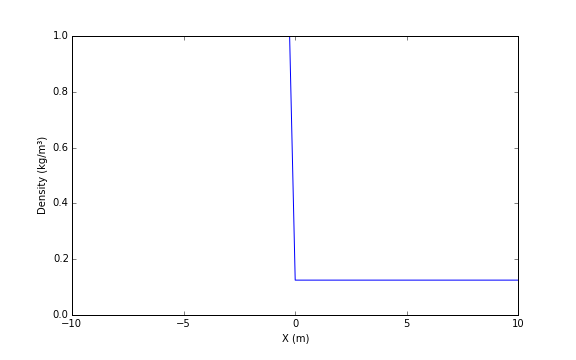
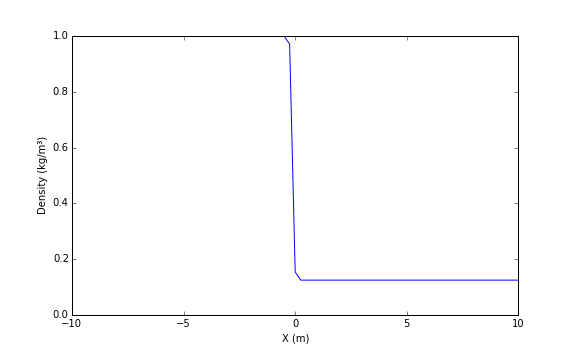
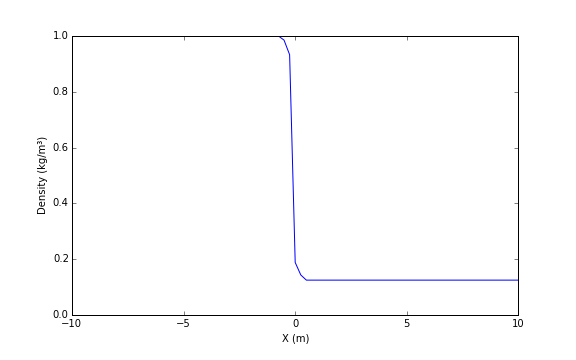
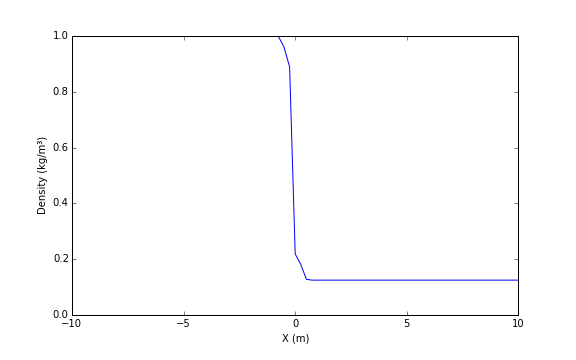
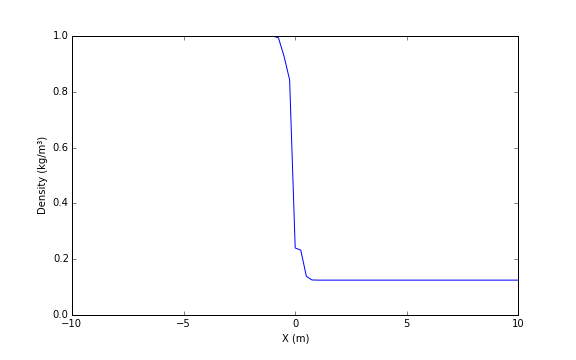
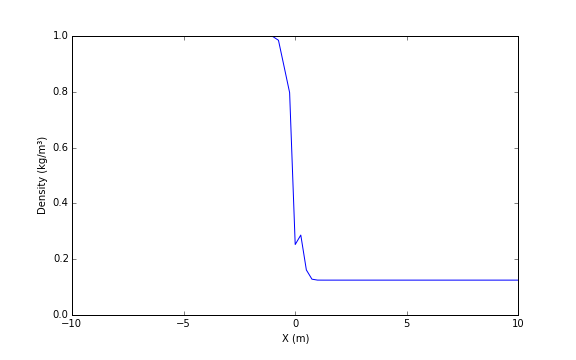
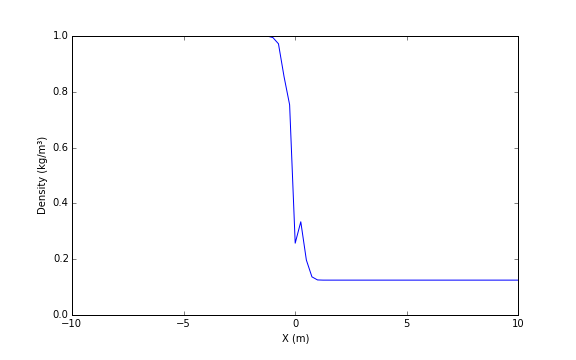
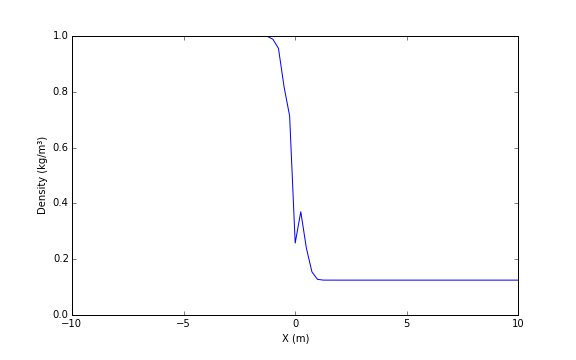
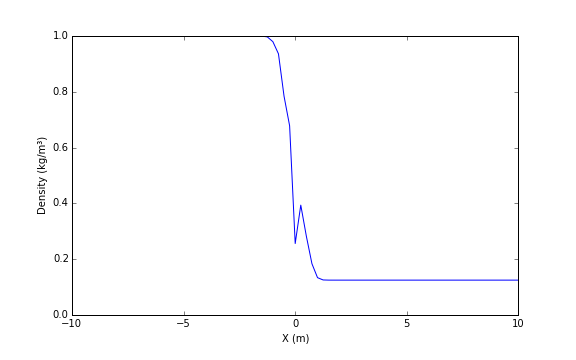
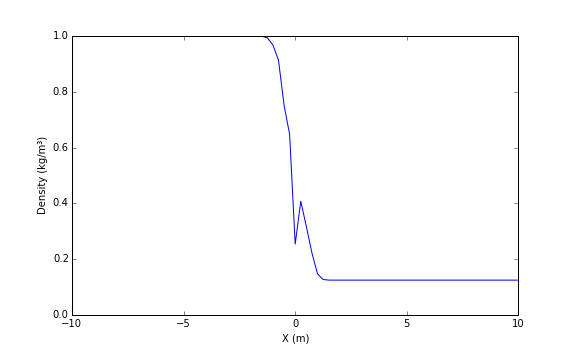
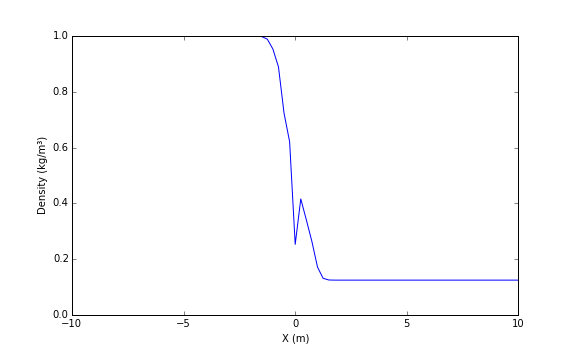
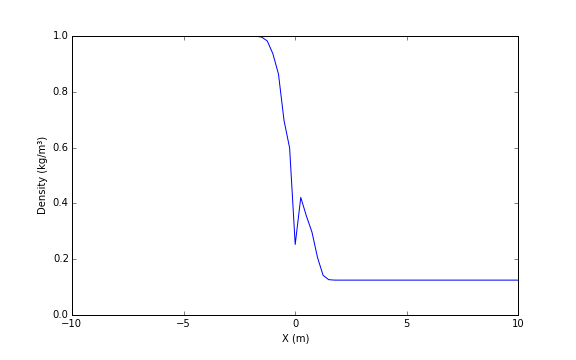
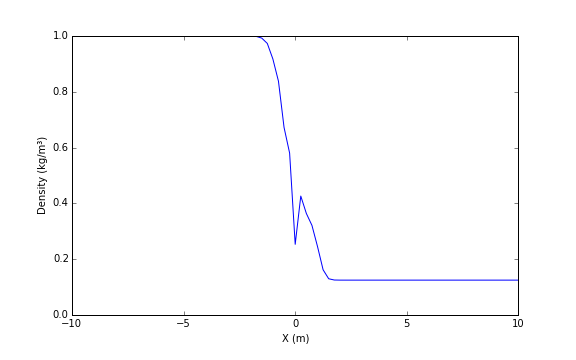
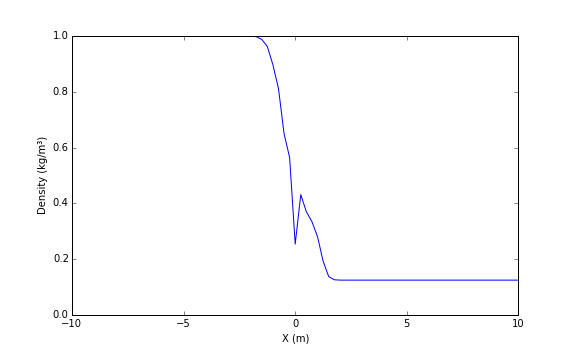
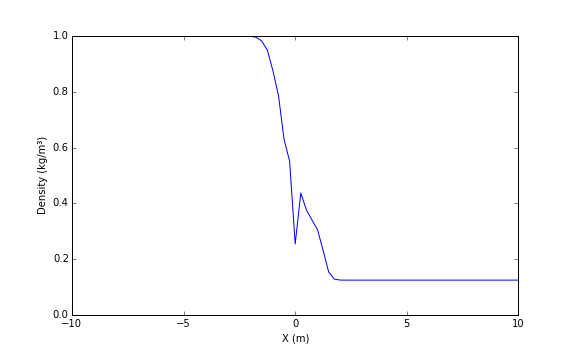
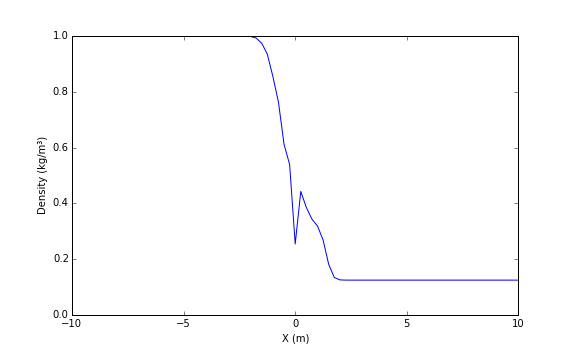
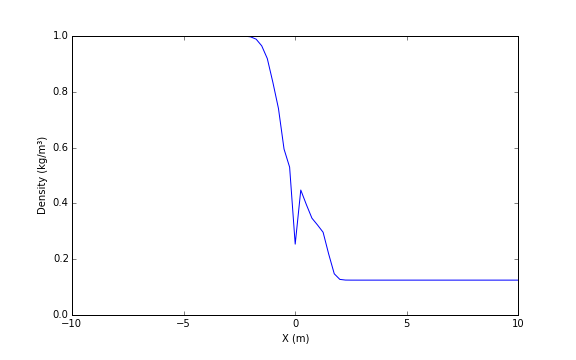
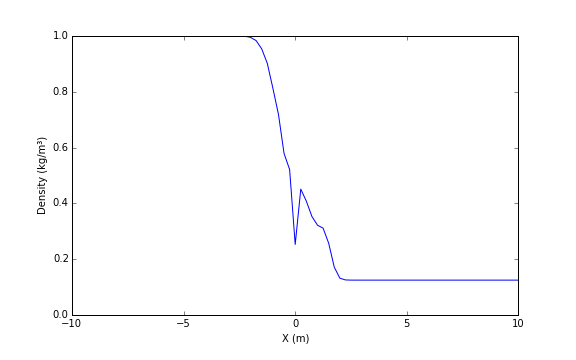
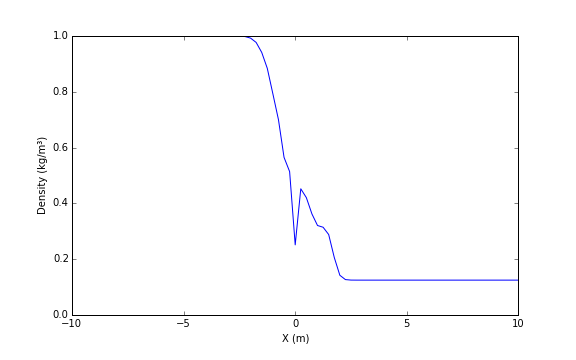
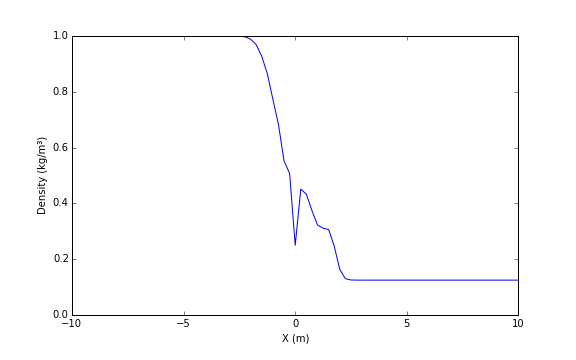
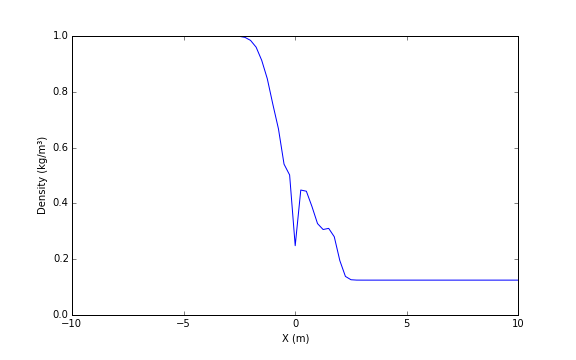
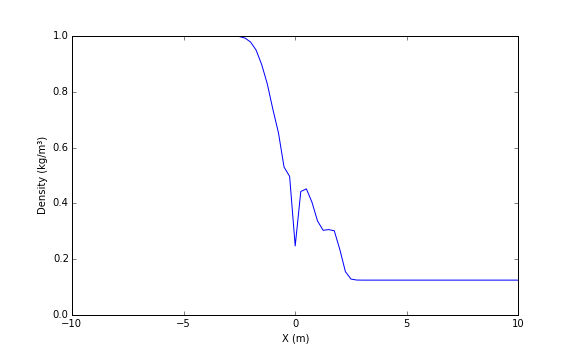
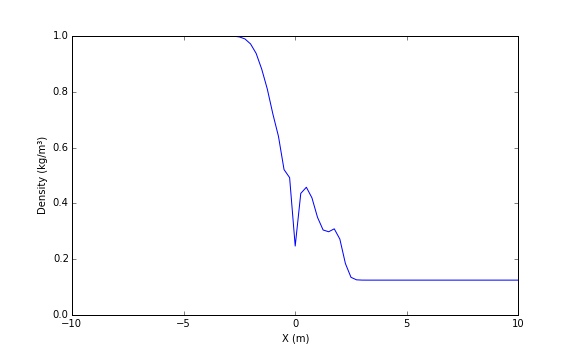
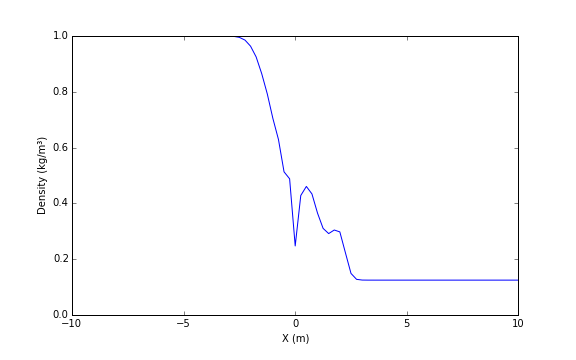
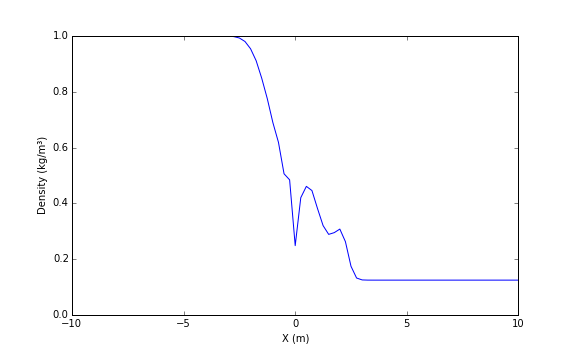
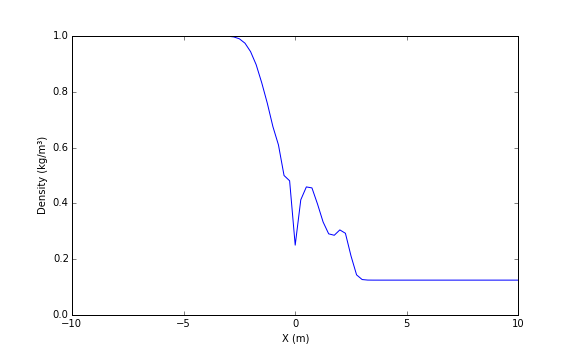
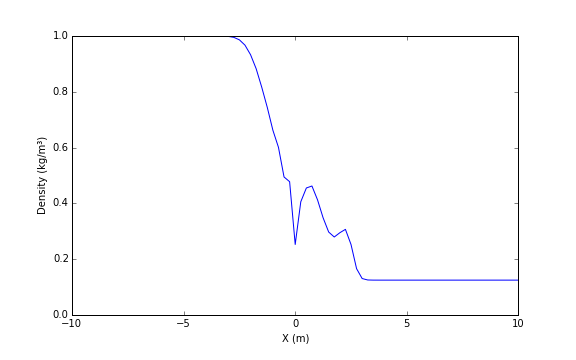
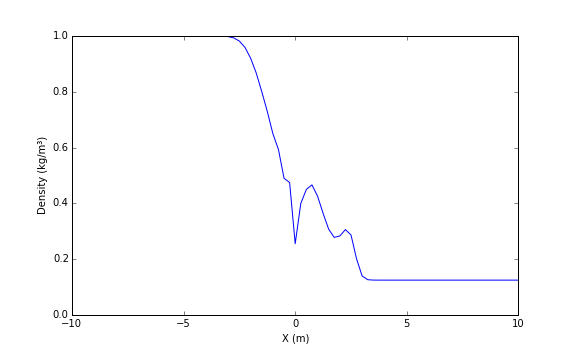
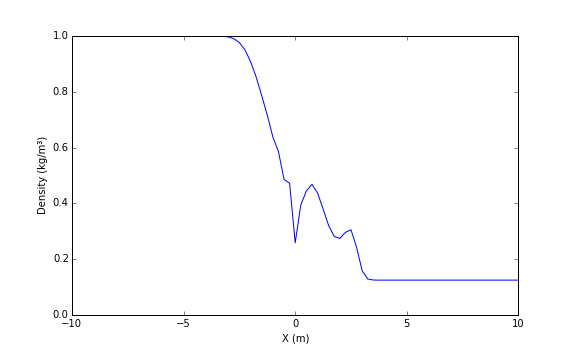
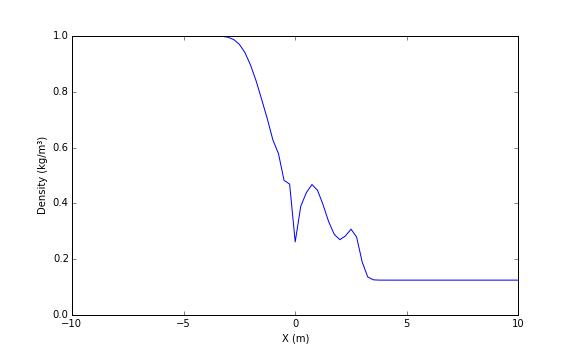
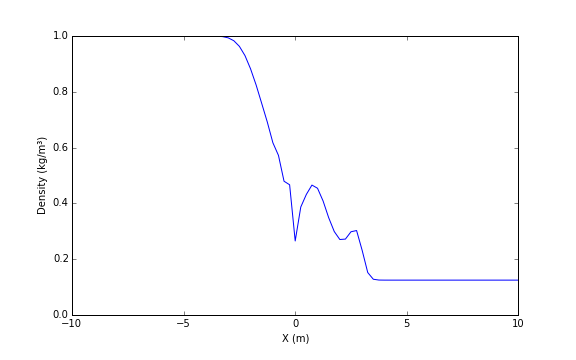
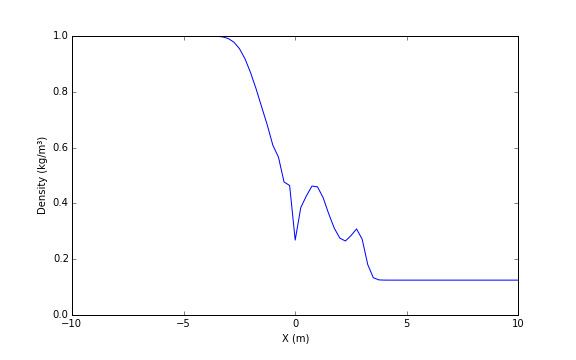
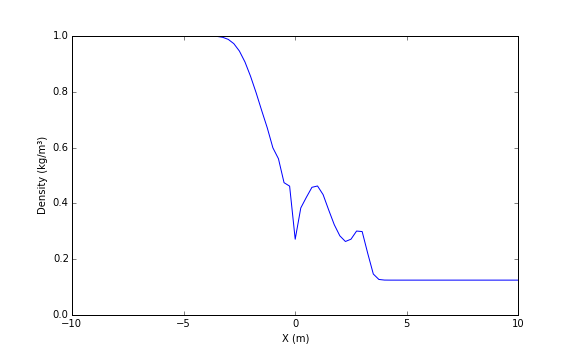
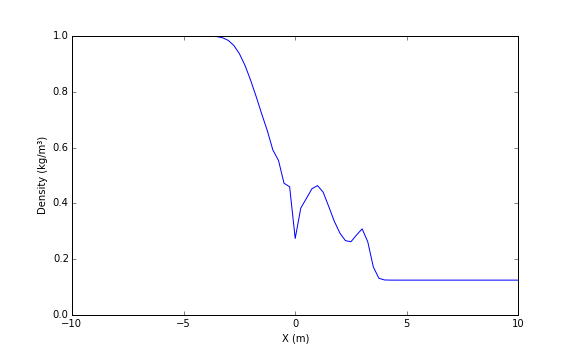
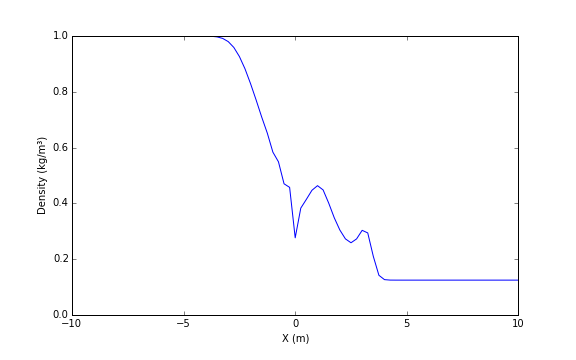
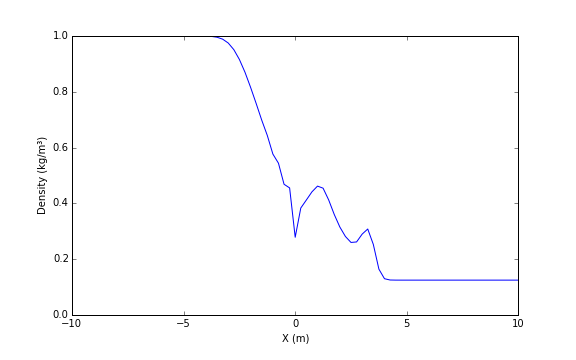
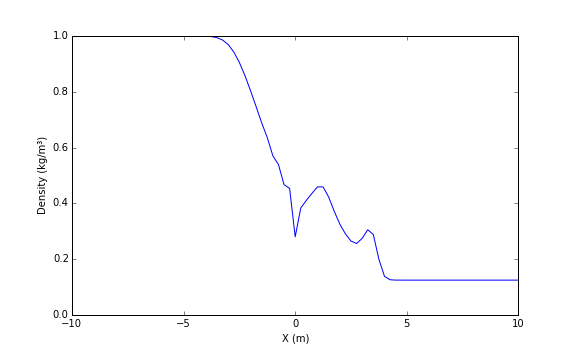
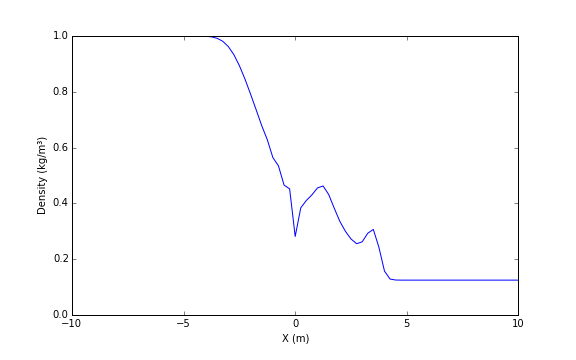
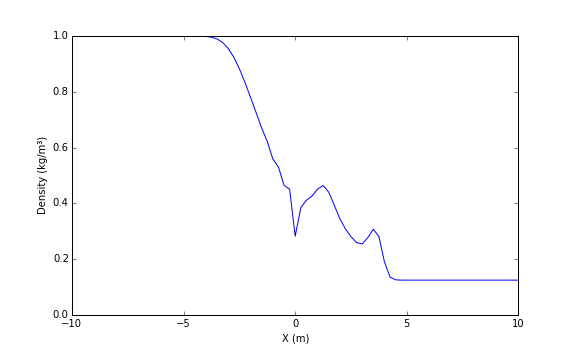
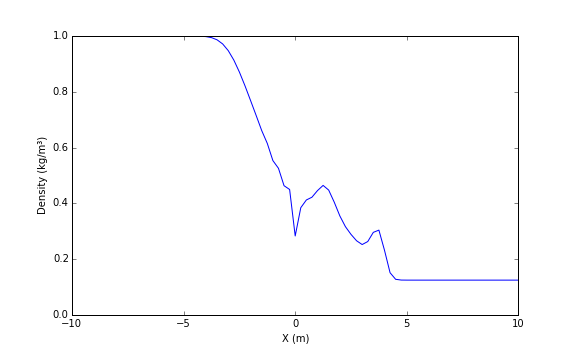
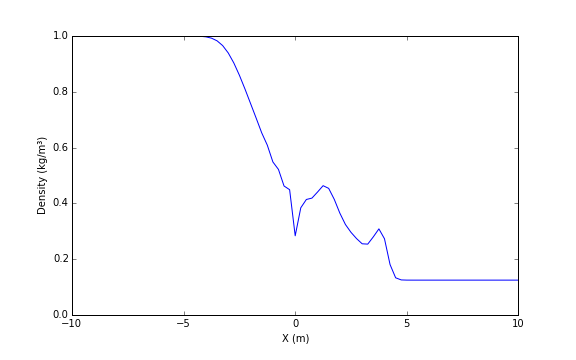
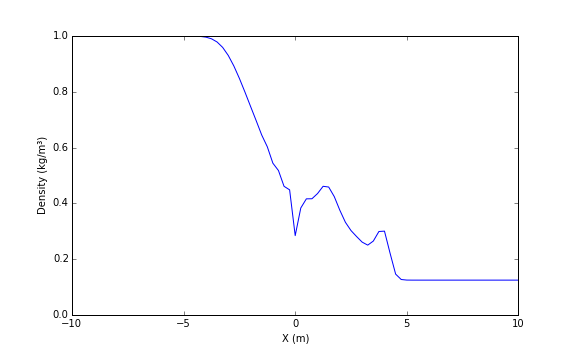
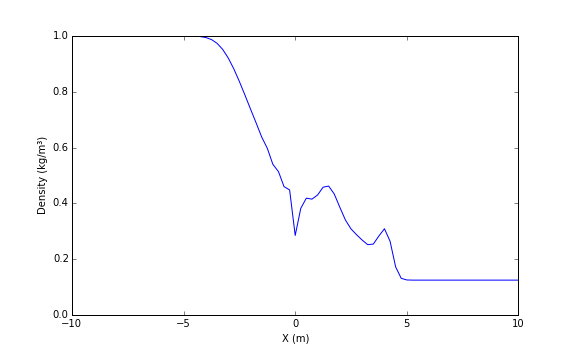
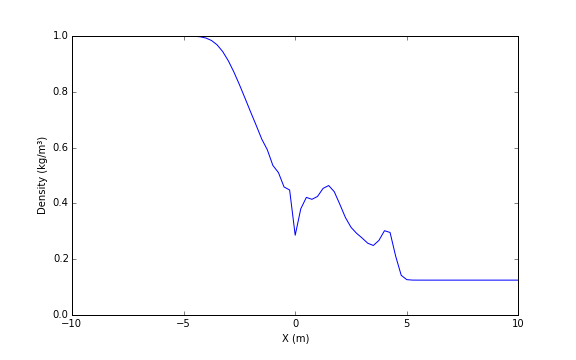
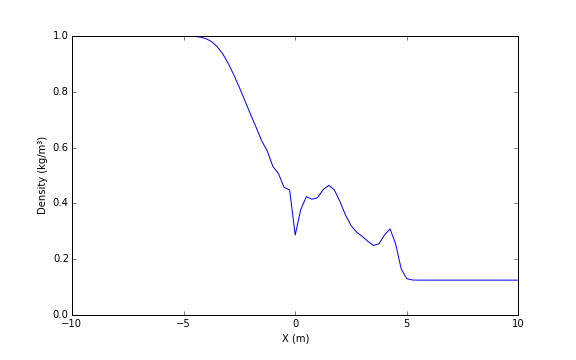
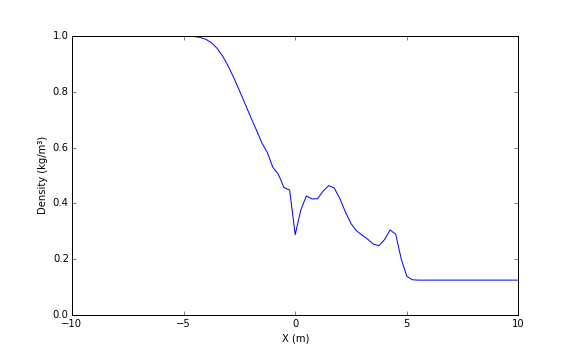
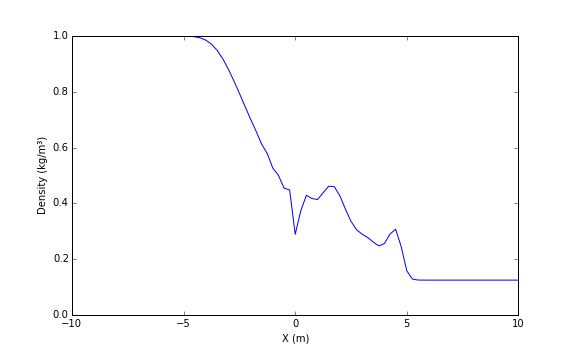
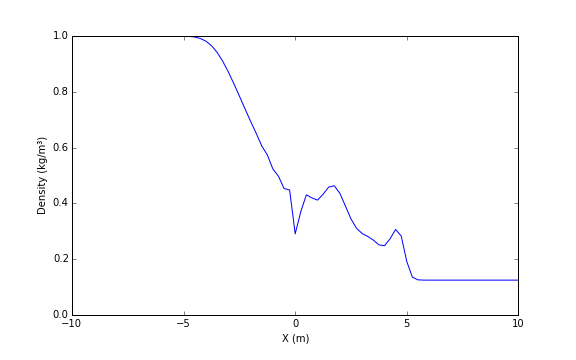
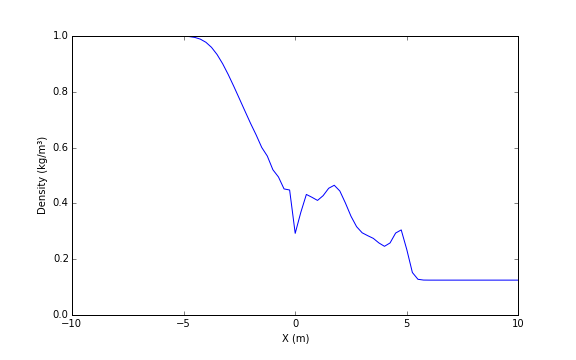
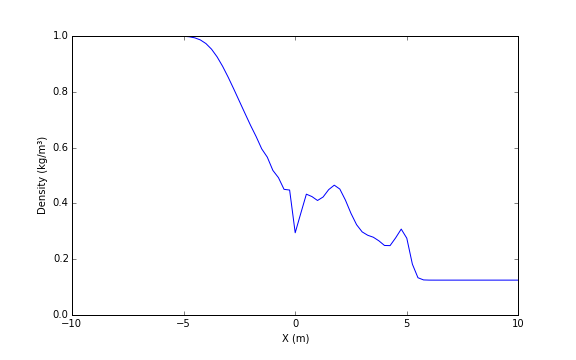
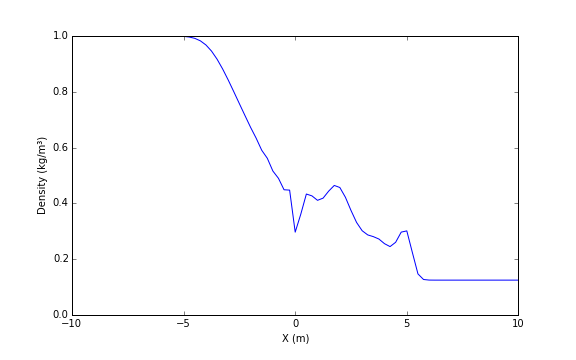

In [8]:
  
from JSAnimation.IPython_display import display_animation
from matplotlib import animation 

def visual(ls,nx,ylimite,labelx,labely,size):
    l = int(size/2)
    fig=plt.figure(figsize=(8,5))
    ax=plt.axes(xlim=(-l,l),ylim = ylimite,xlabel = labelx,ylabel=labely)
    line=ax.plot([],[],ls='-')[0]
    lis = np.ones(nx)
    x = np.linspace(-l, l, num=nx)
    def anim(i):
        line.set_data(x,lis)
        lis[:]=ls[i]
    return animation.FuncAnimation(fig, anim,
                        frames=len(ls),interval=100)

visual(rho,nx,(0,1),"X (m)","Density (kg/m³)",L)



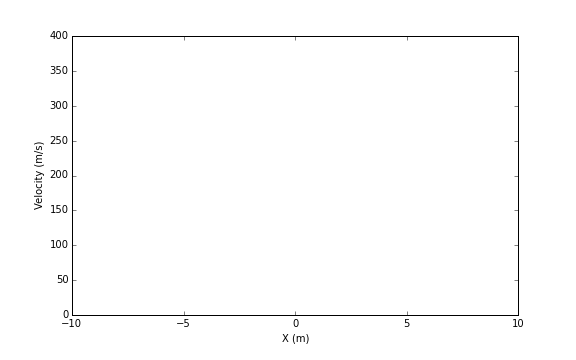
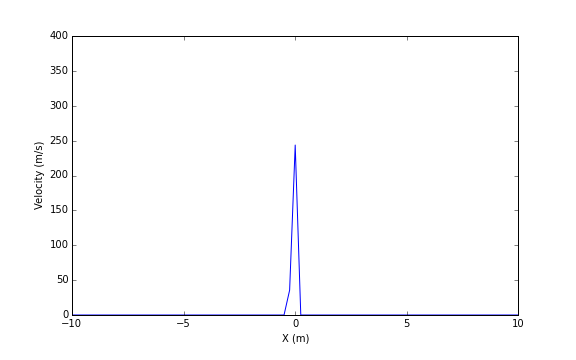
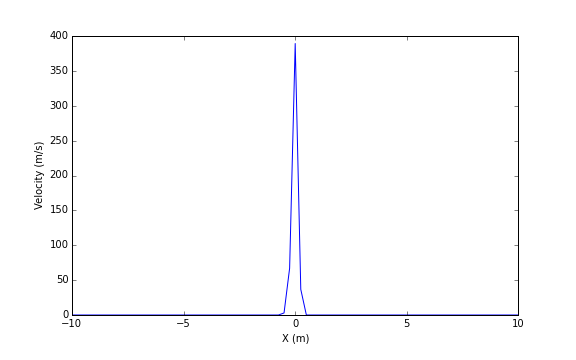
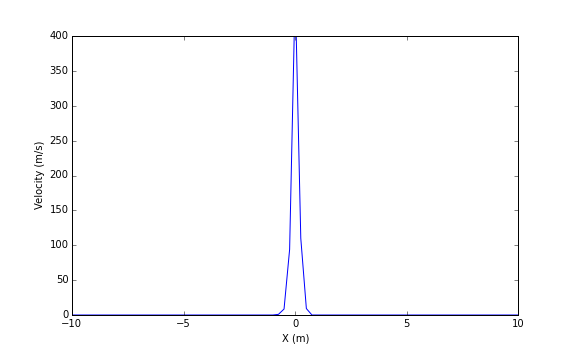
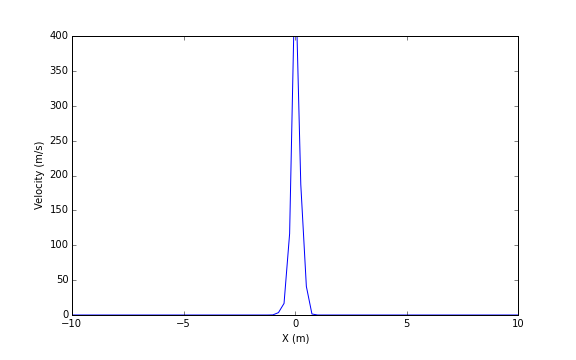
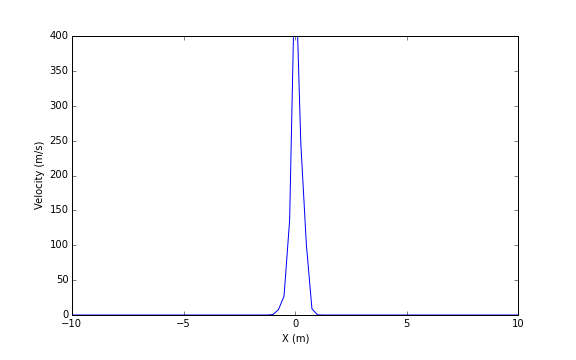
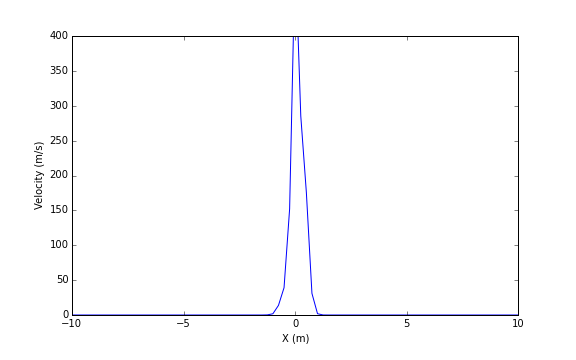
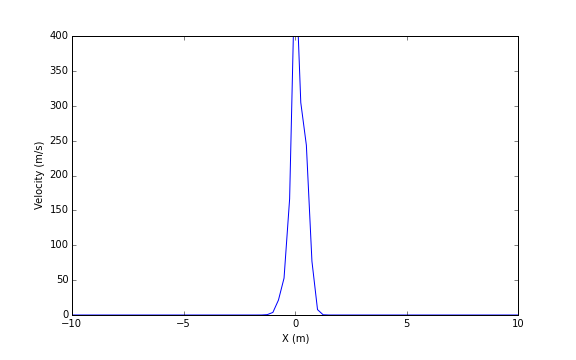
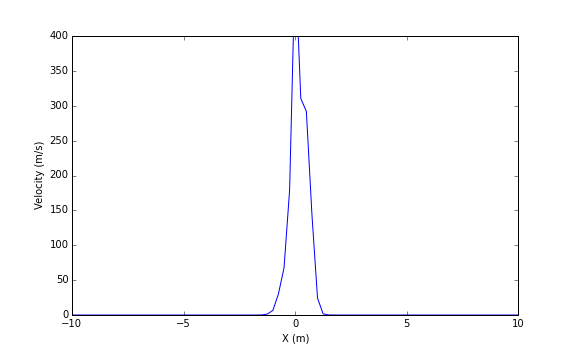
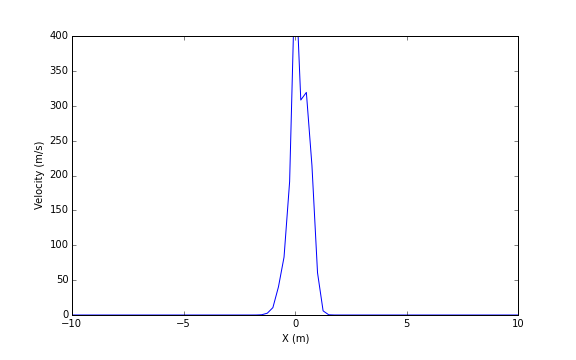
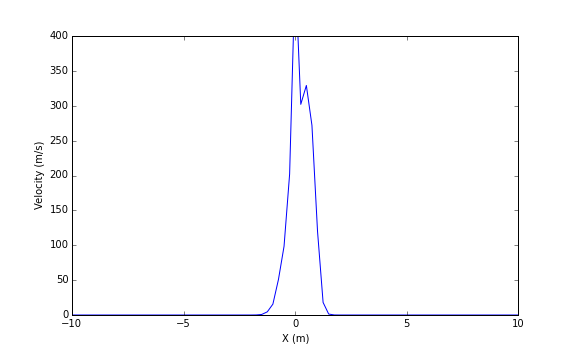
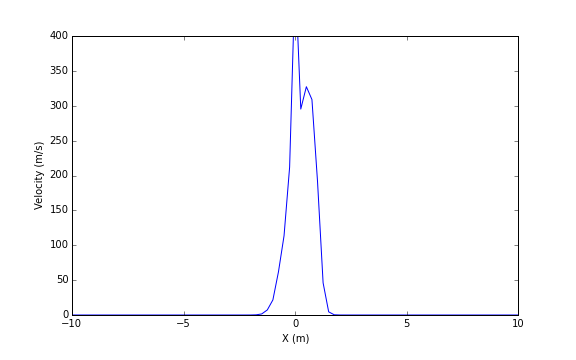
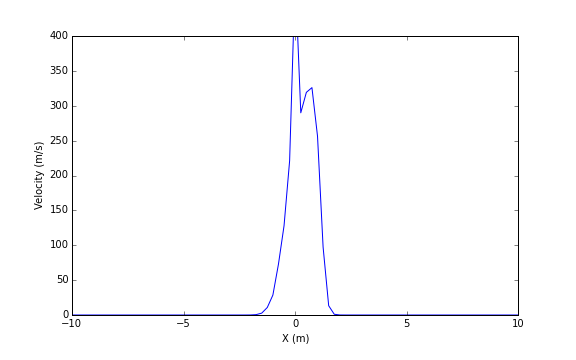
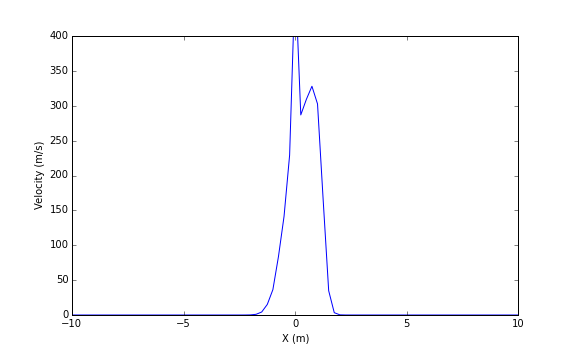
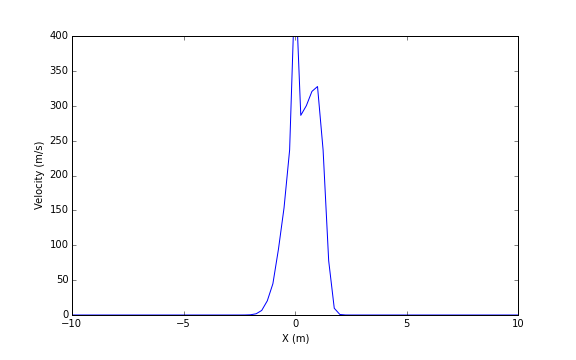
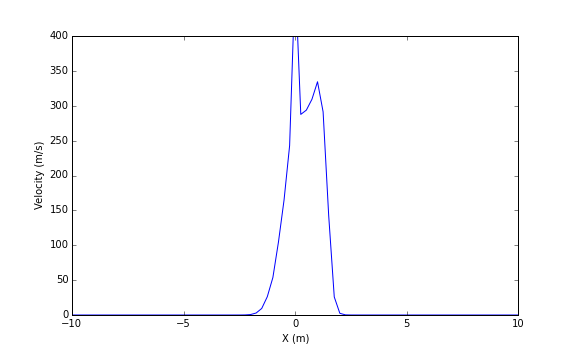
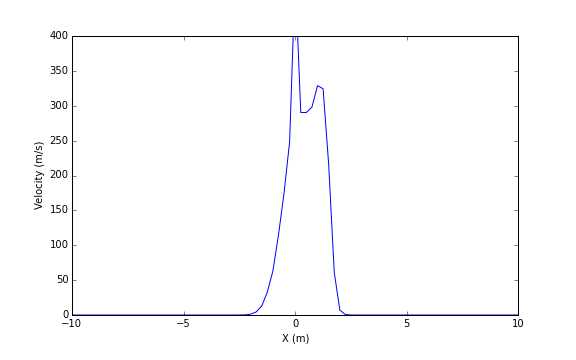
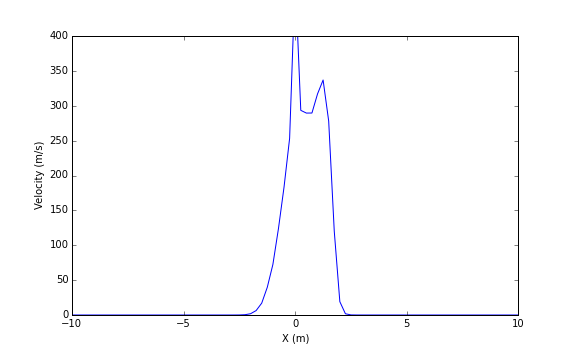
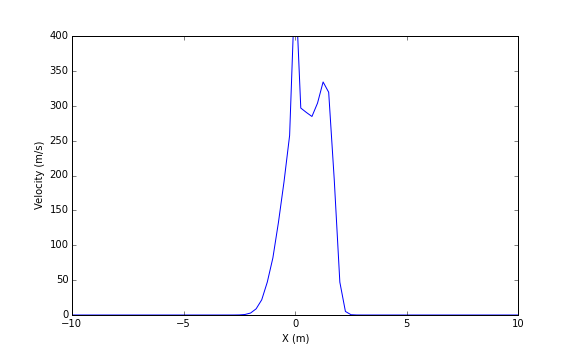
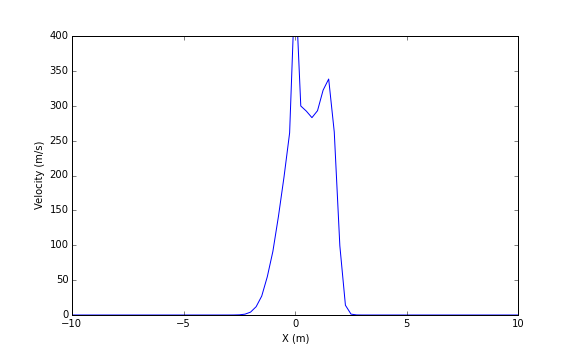
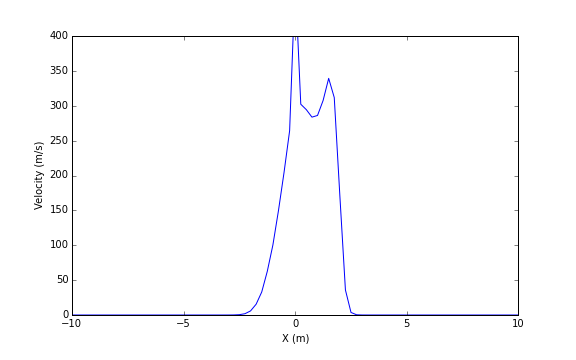
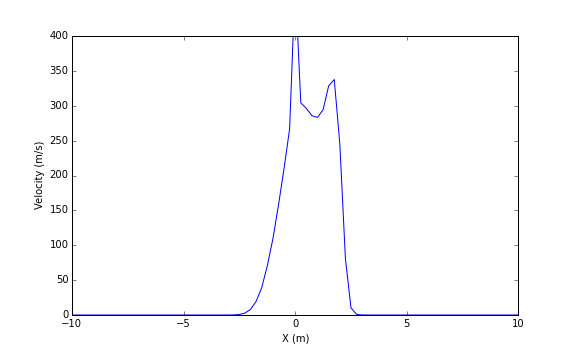
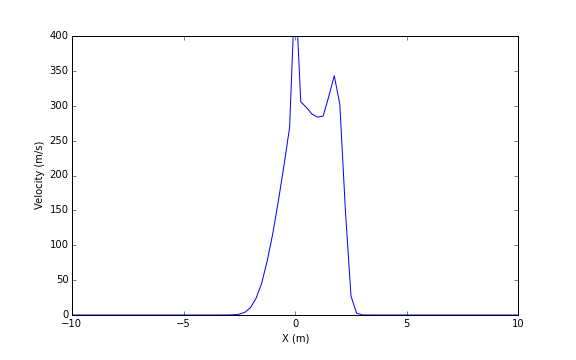
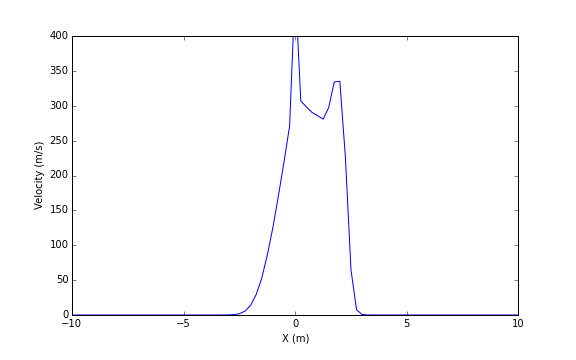
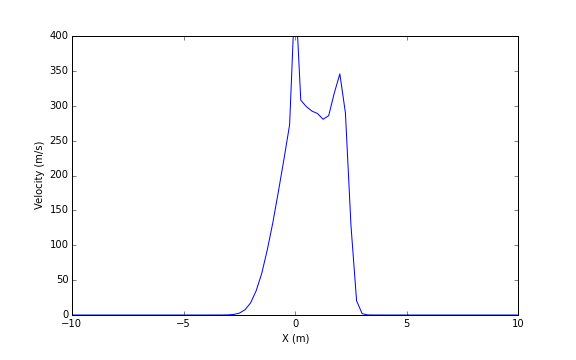
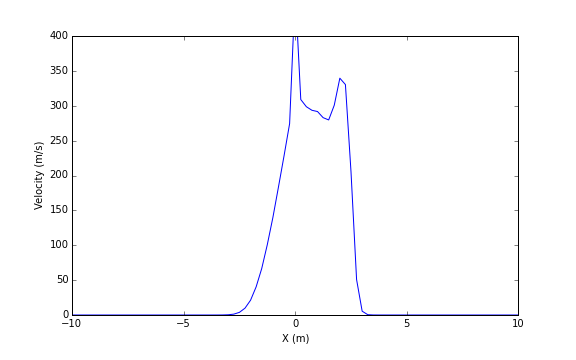
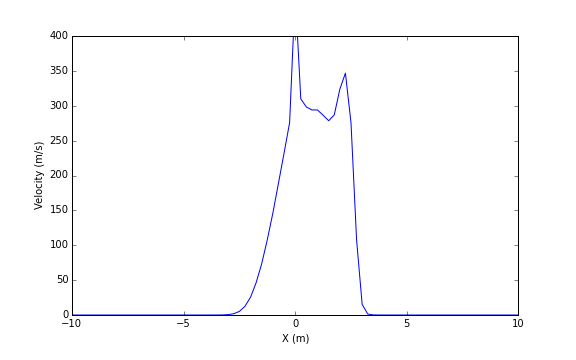
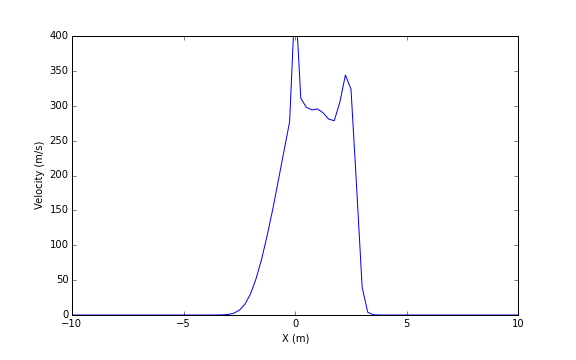
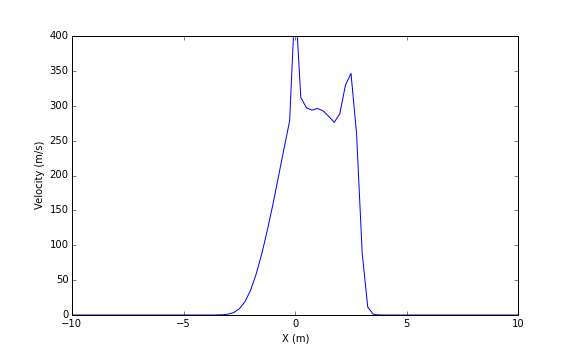
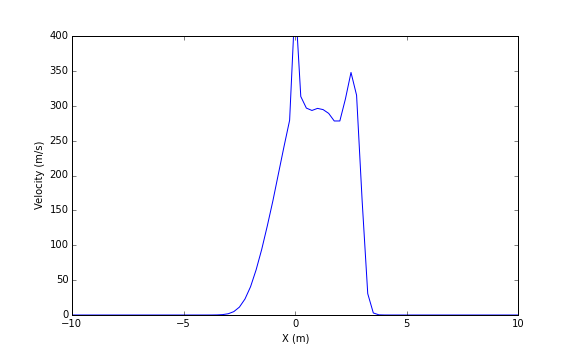
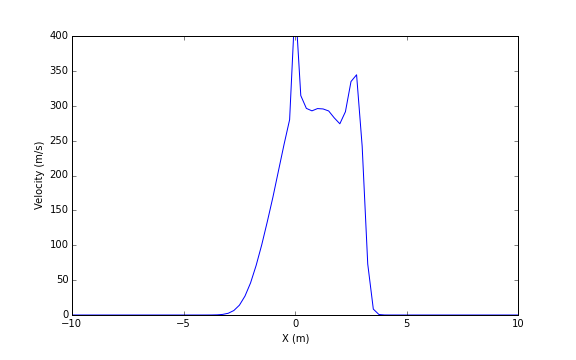
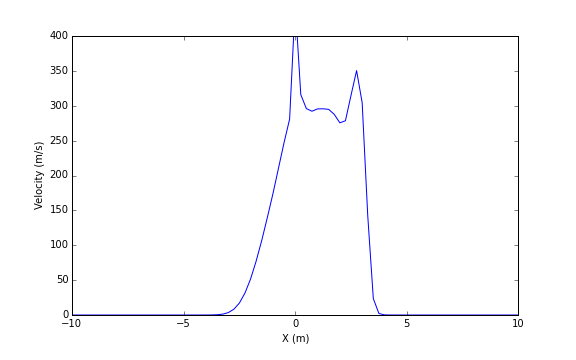
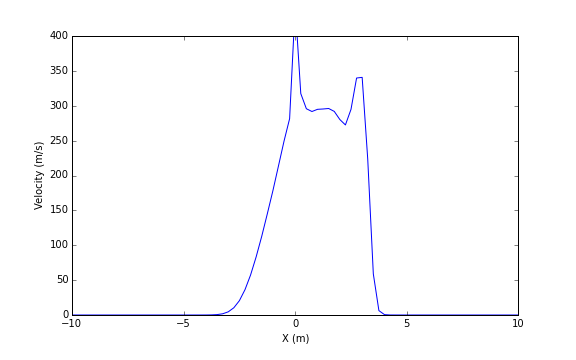
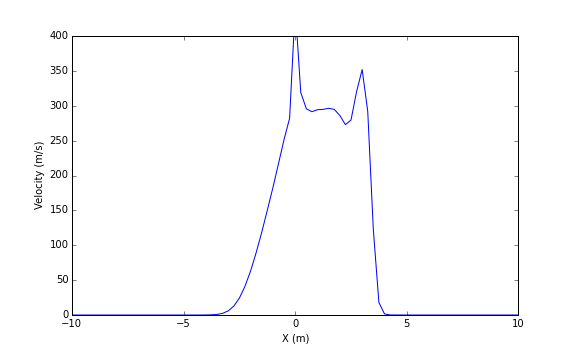
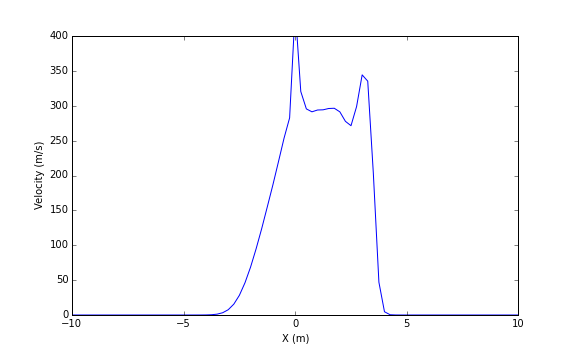
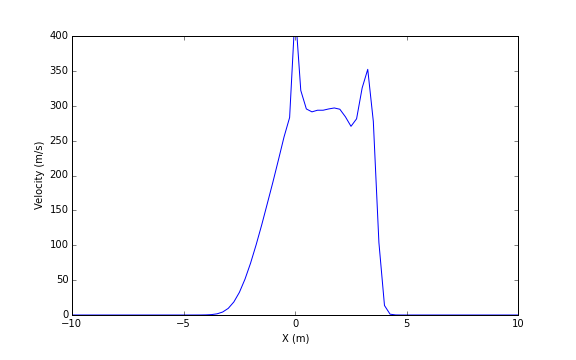
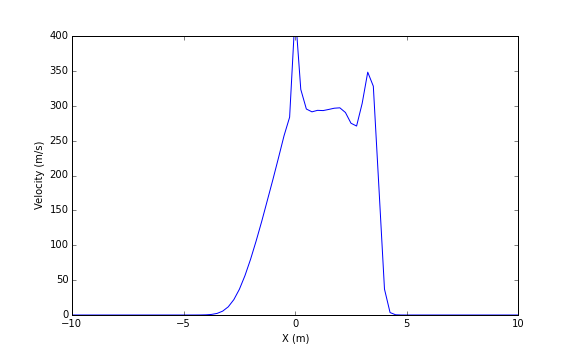
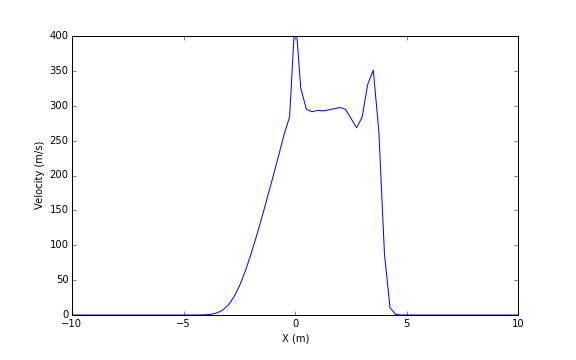
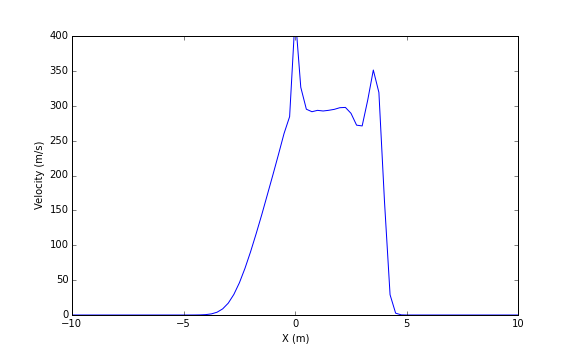
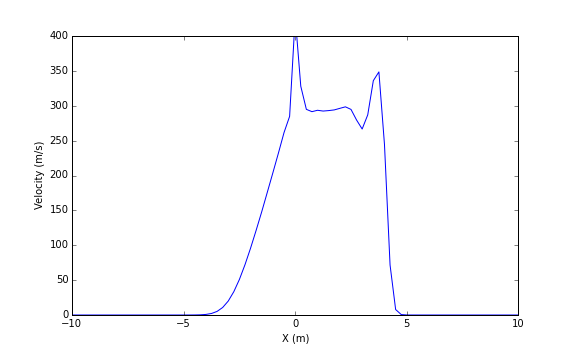
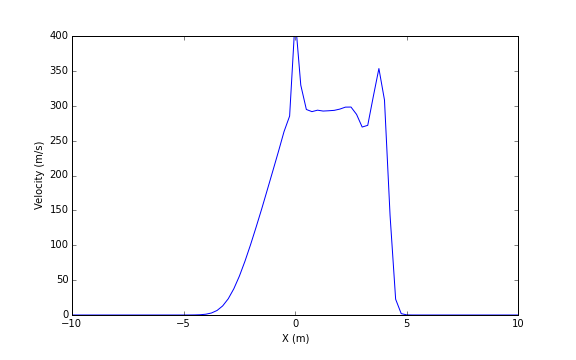
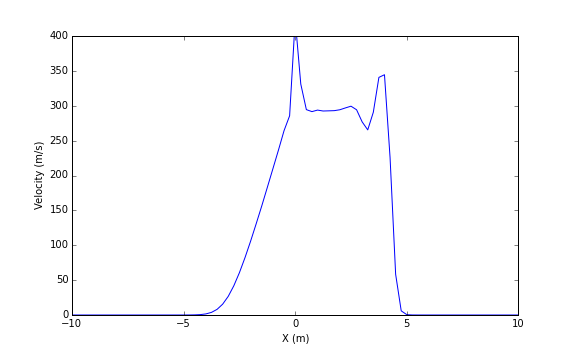
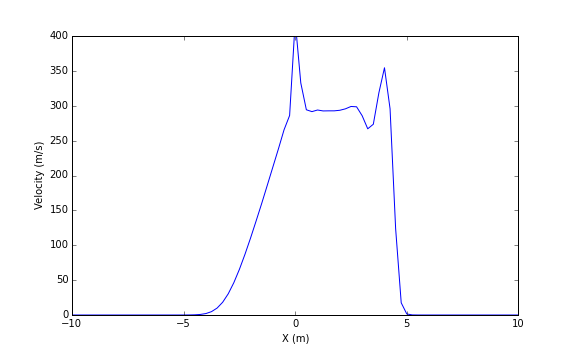
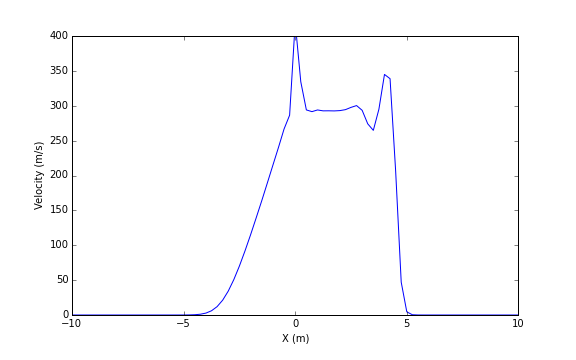
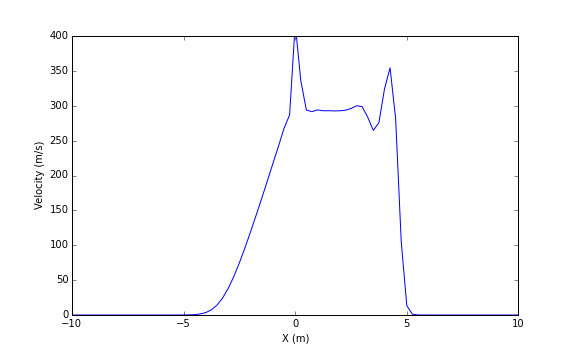
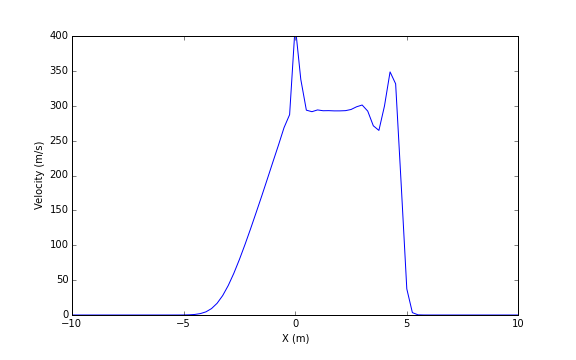
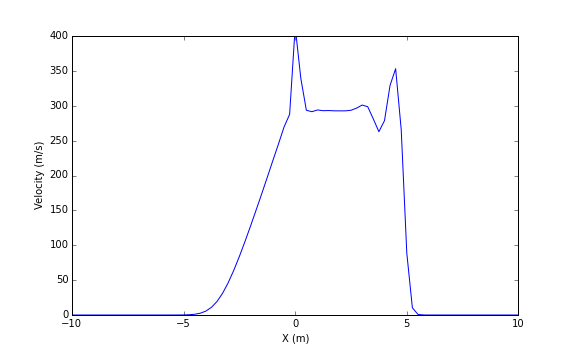
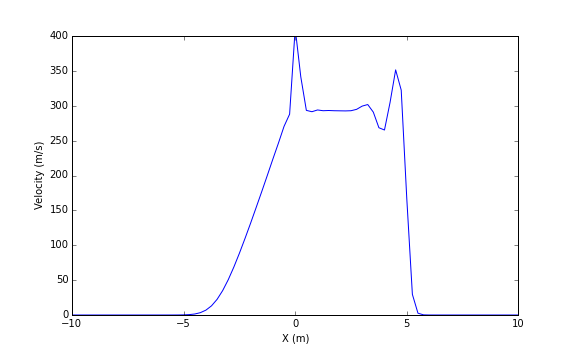
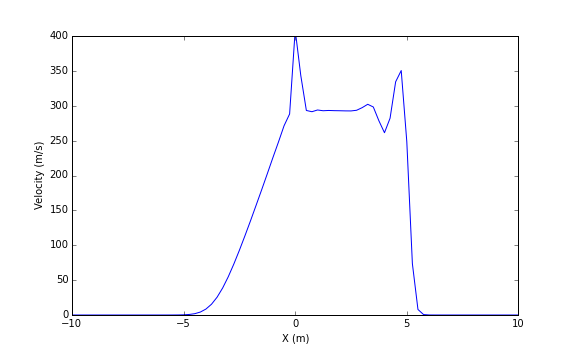
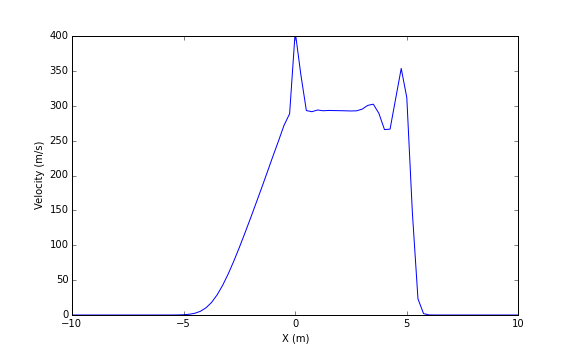
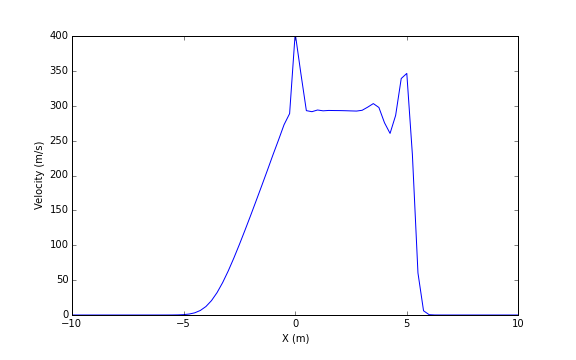

In [9]:
visual(v,nx,(0,400),"X (m)","Velocity (m/s)",L)


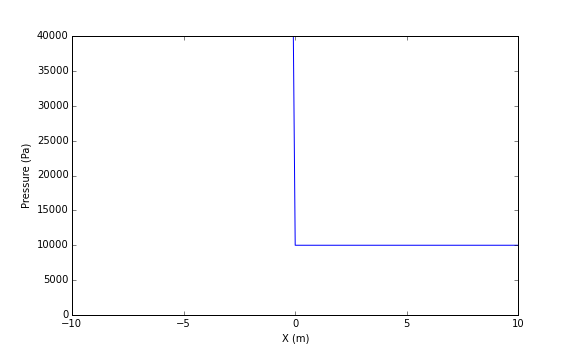
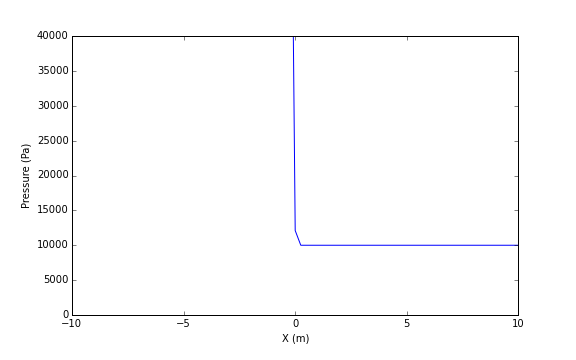
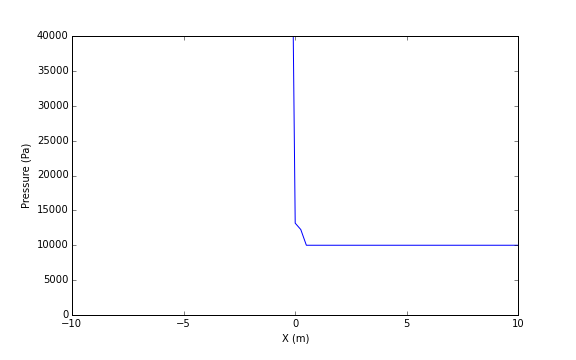
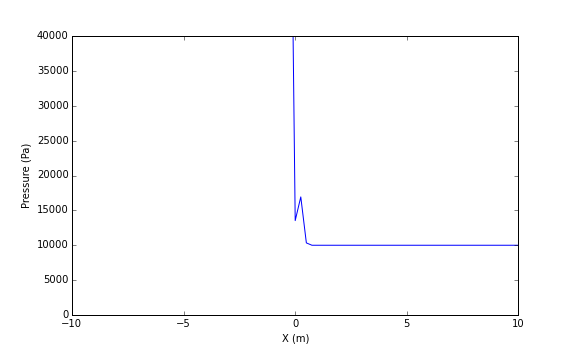
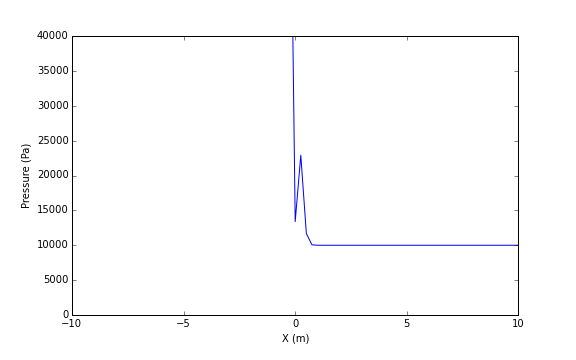
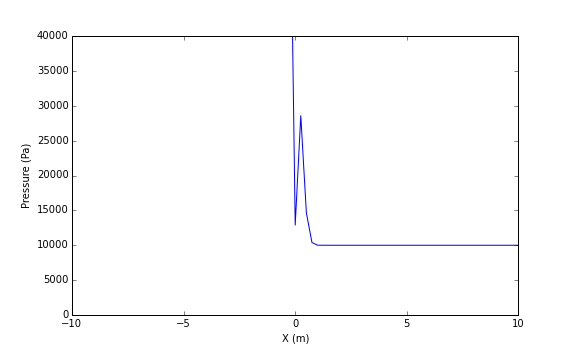
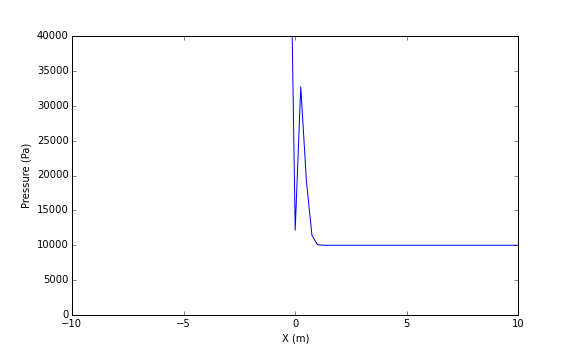
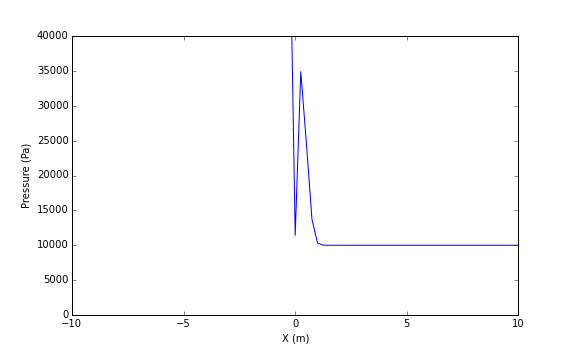
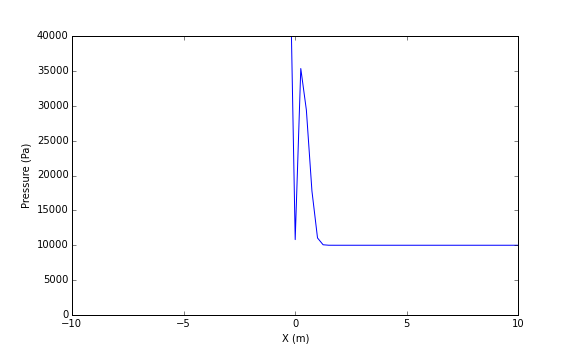
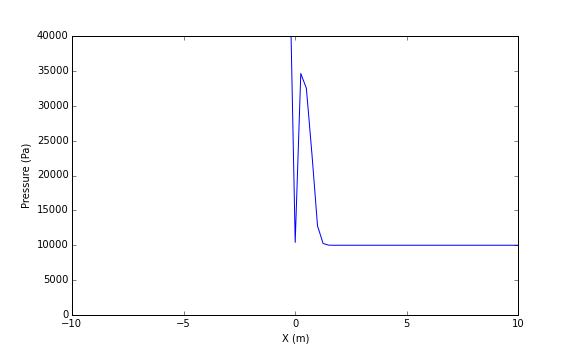
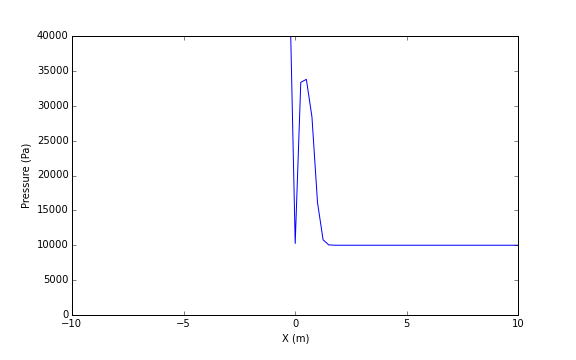
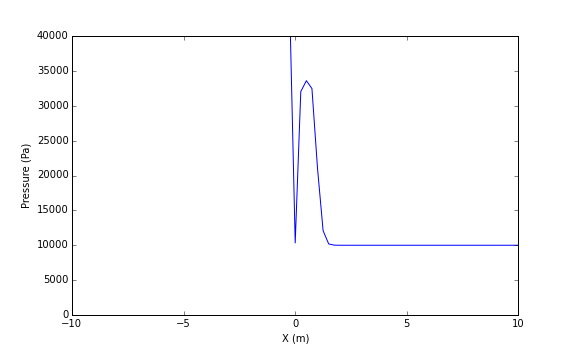
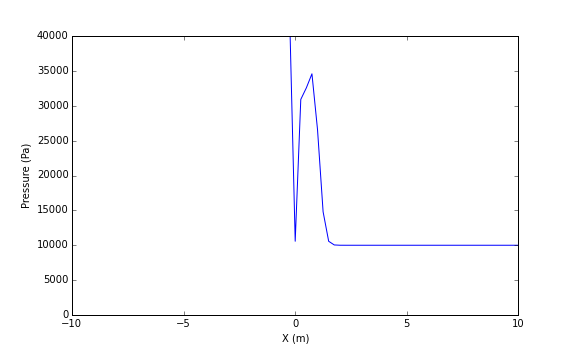
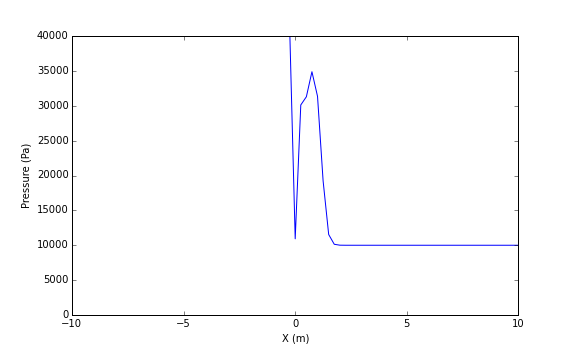
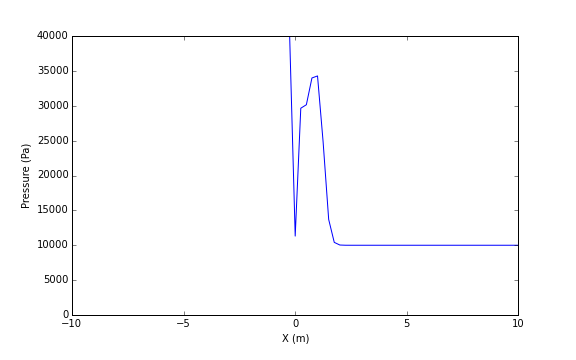
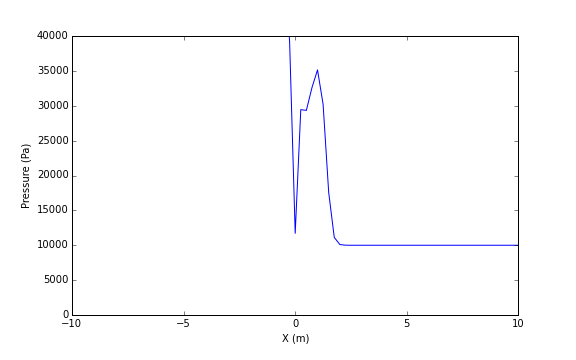
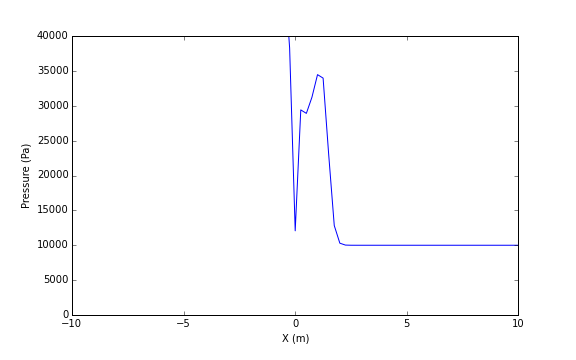
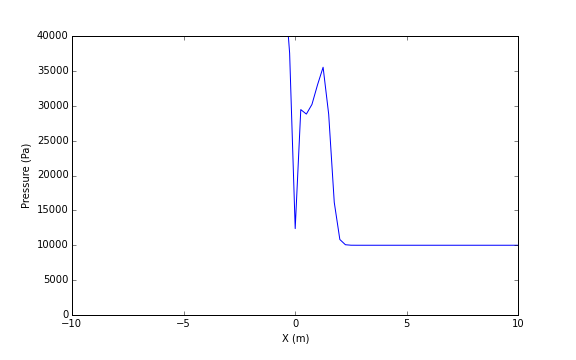
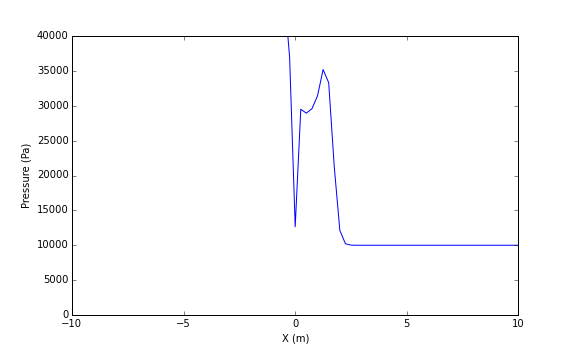
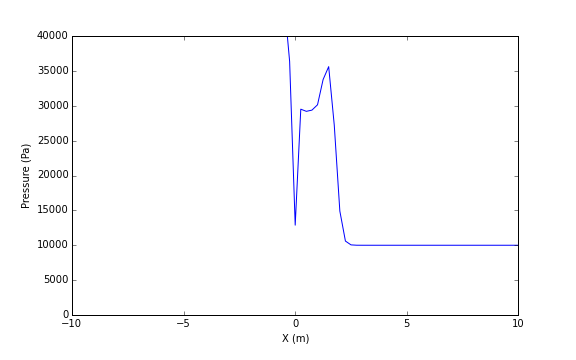
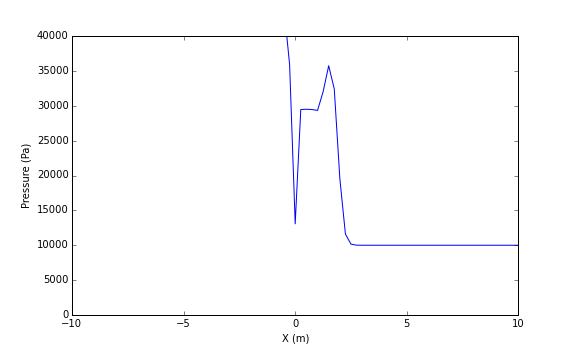
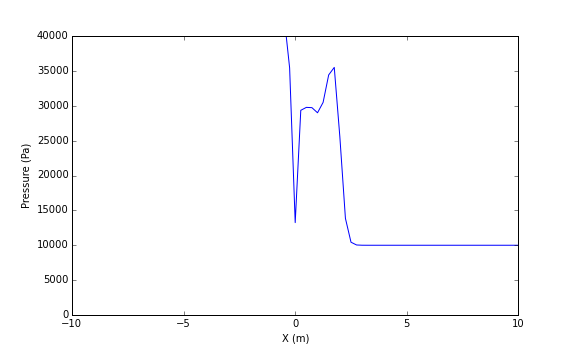
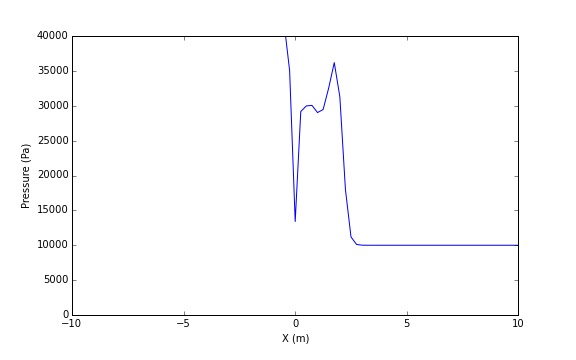
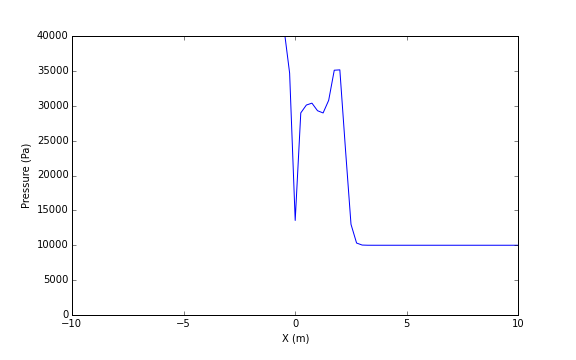
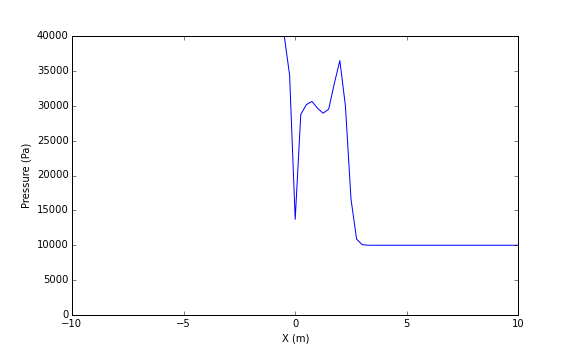
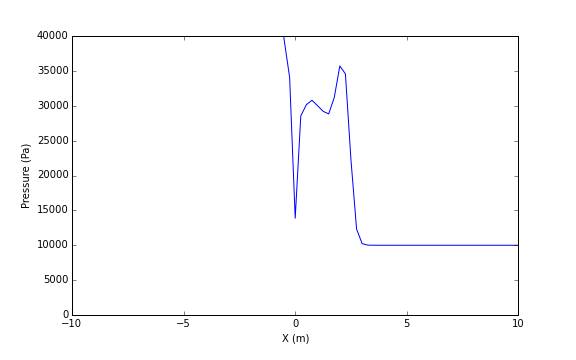
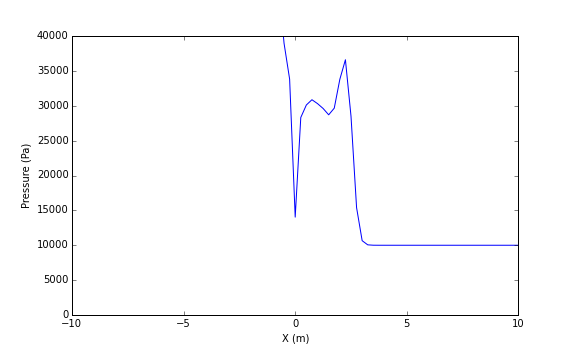
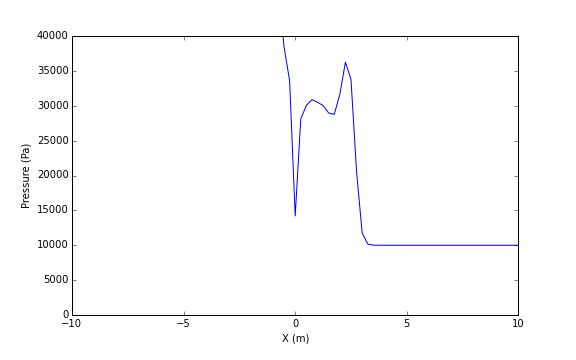
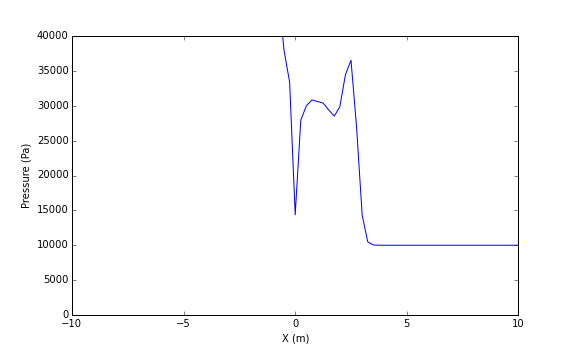
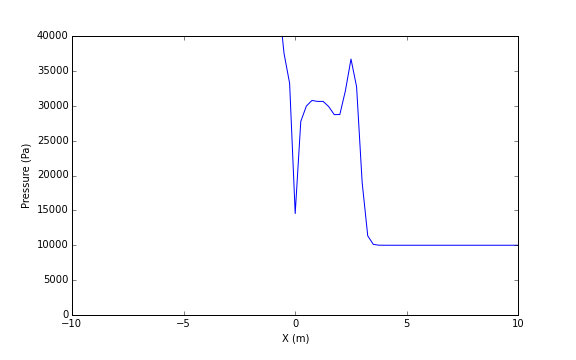
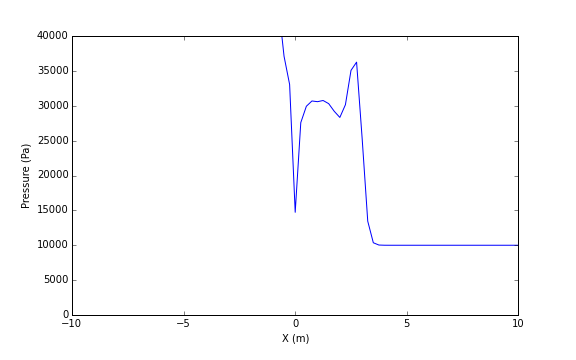
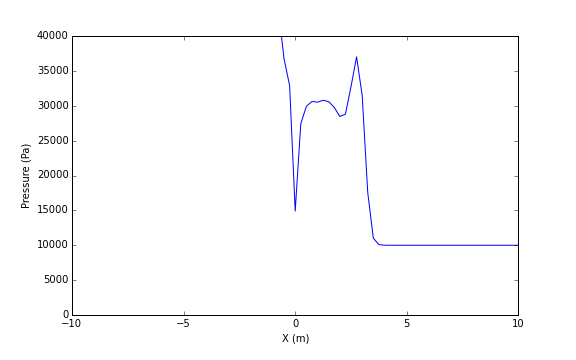
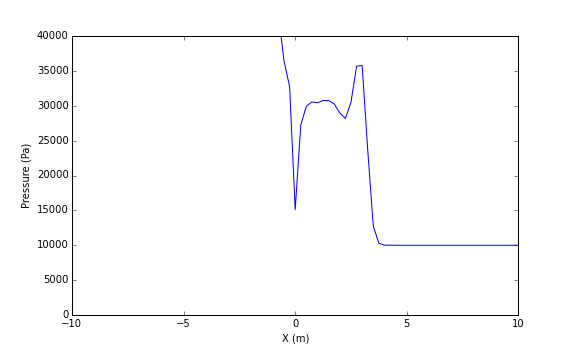
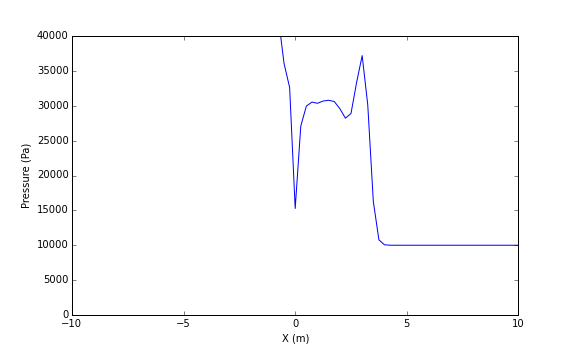
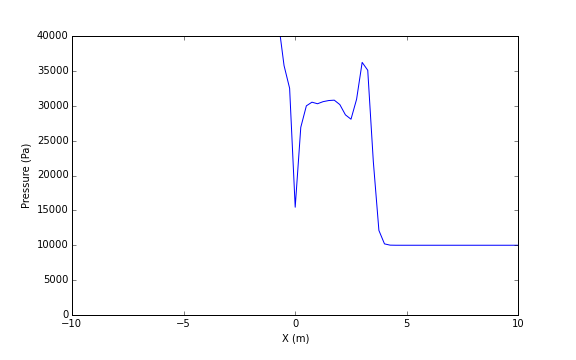
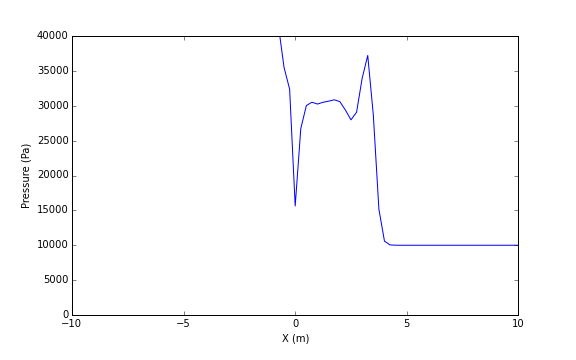
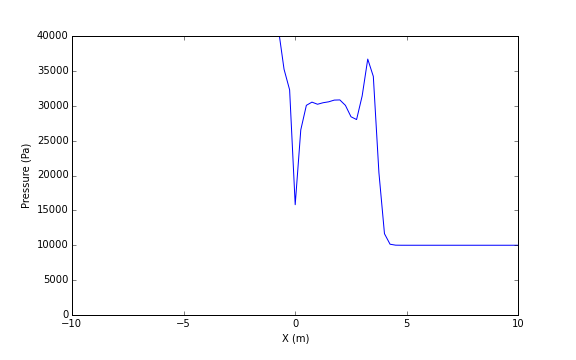
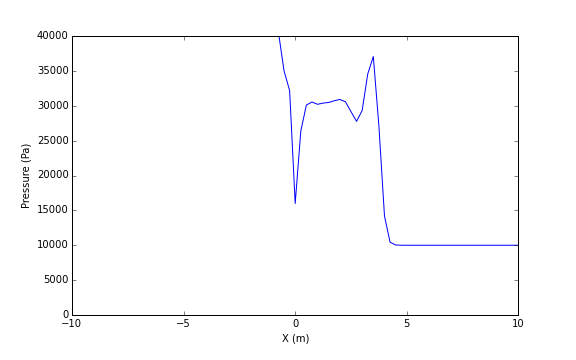
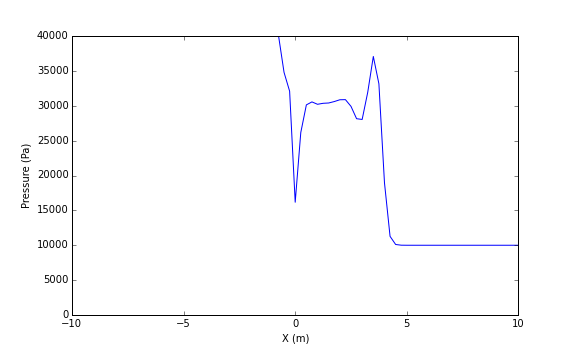
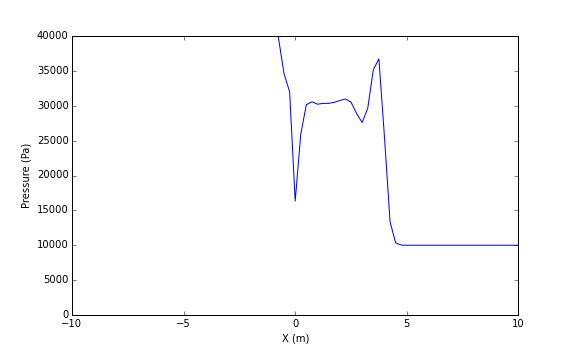
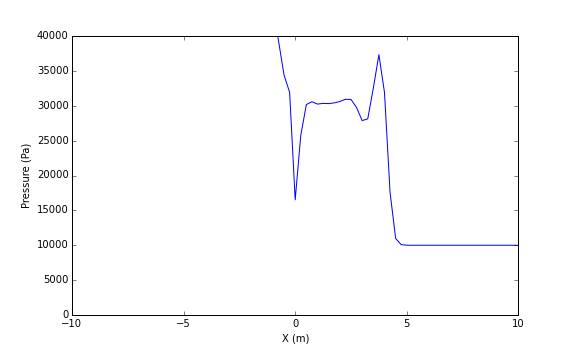
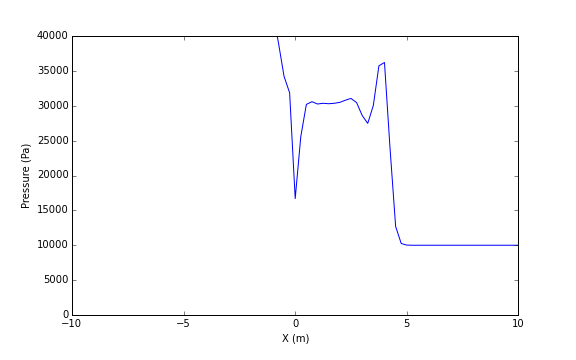
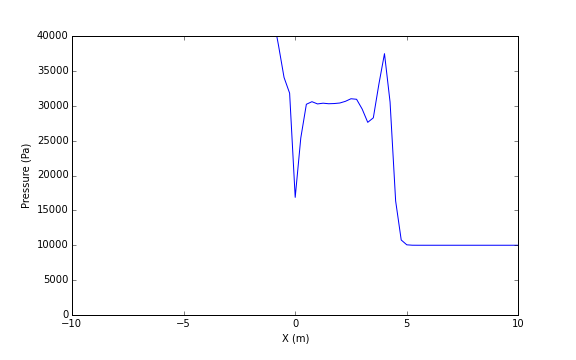
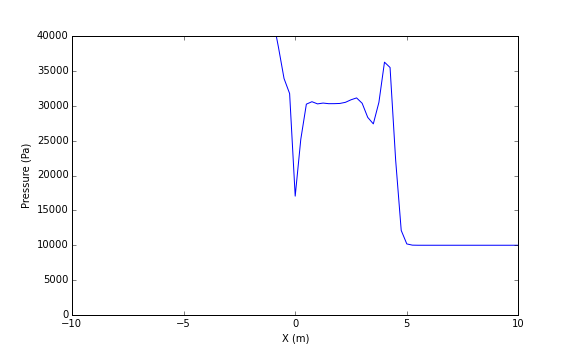
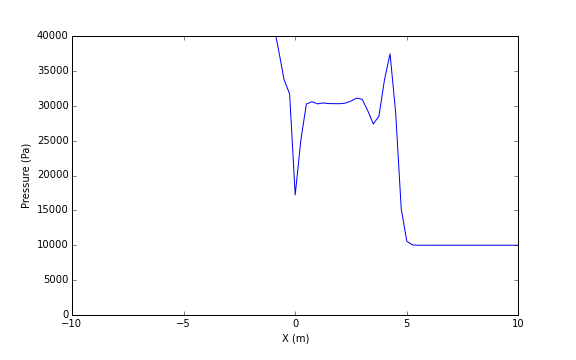
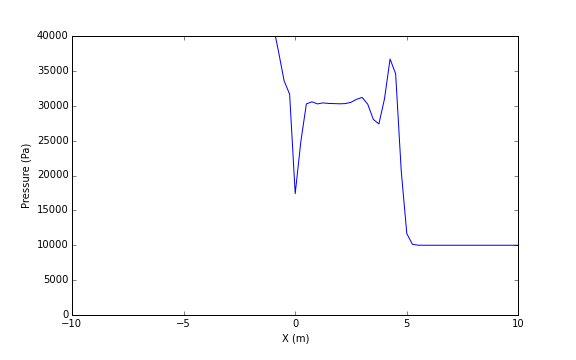
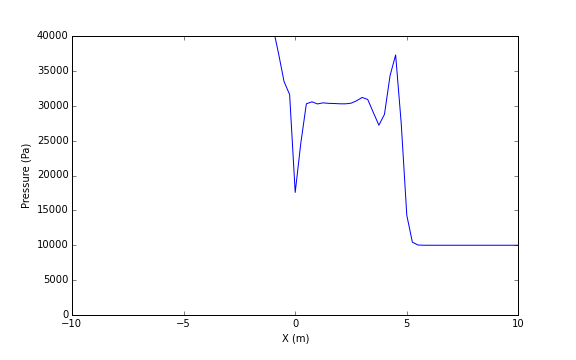
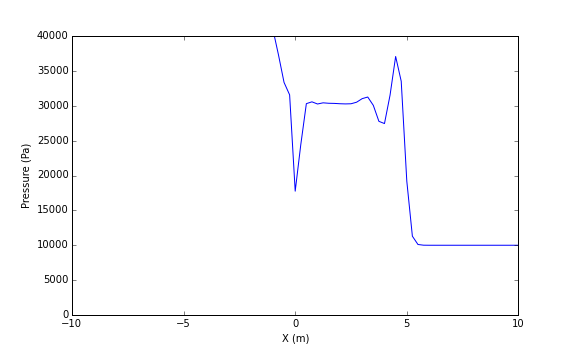
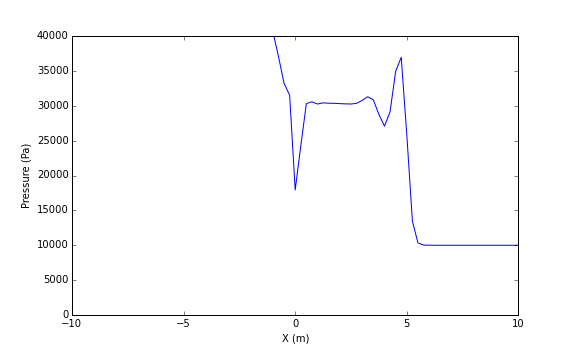
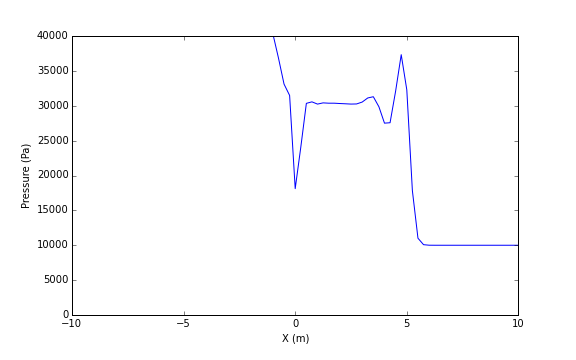
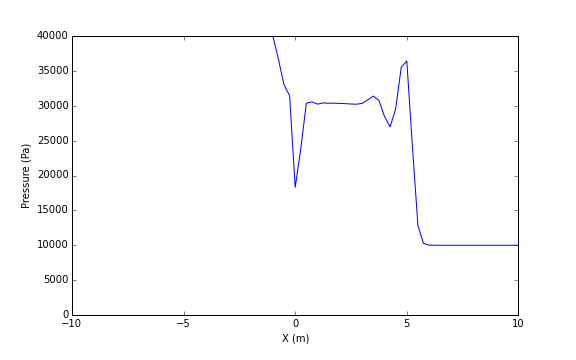

In [10]:
visual(p,nx,(0,40000),"X (m)","Pressure (Pa)",L)

On voit sur les graphiques que des que là où le choc a lieu, on a augmention de de la densité, de la vitesse et de la densité dans la zone de basse pression. Physiquement cela est totalement intuitif, on tend a retourné vers l'équilibre thermodynamique ce qui implique l'équilibre mécanique, la pression soit la même en tout point du tube. Regardons un peu le lien entre les différentes variables. On voit que les différentes variables se progage à la même vistesse dans le tube. Ce qui peut être expliqué par le fait que les trois variables sont décrites par la même équation.
Un autre point intéressant est de voir que la pression à gauche dinimue continûment. Cela est dû à l'onde d'expansion due au choc qui est de pression inférieur à la pression initiale à gauche. 

Nous travaillons sur un intervalle de temps très restreint, regardons un peu ce qui se passerait si on travaillait sur une intervalle plus grand.


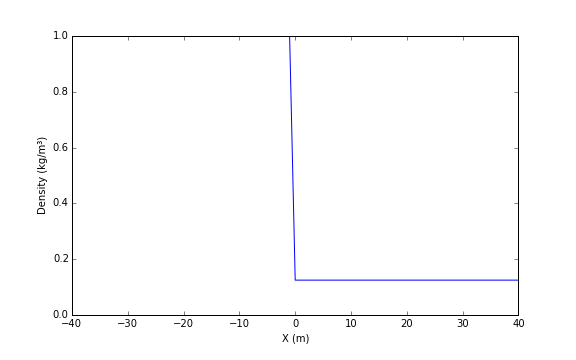
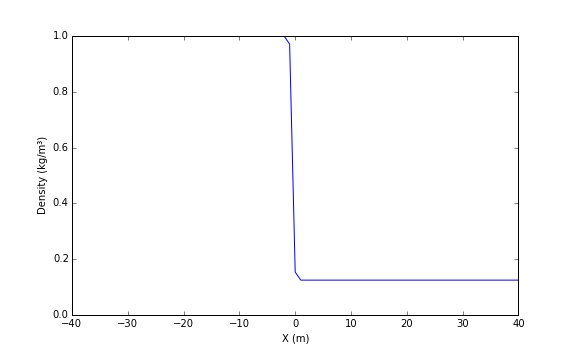
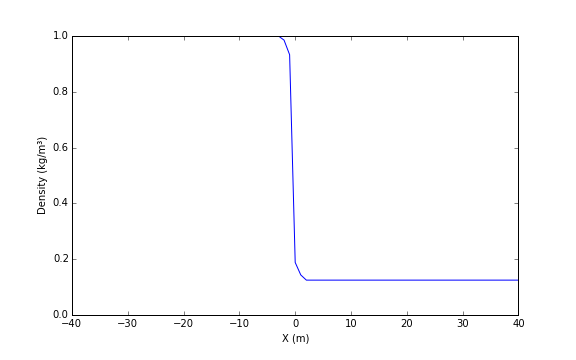
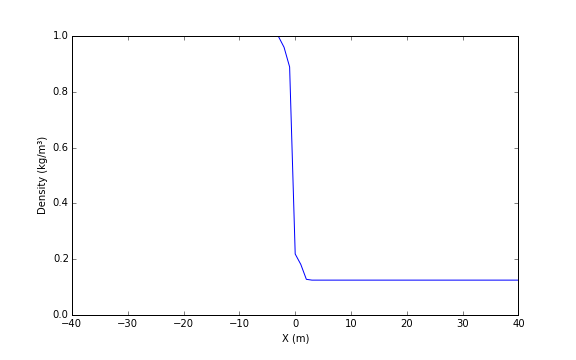
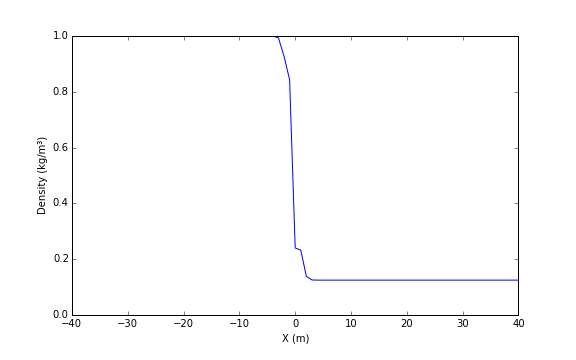
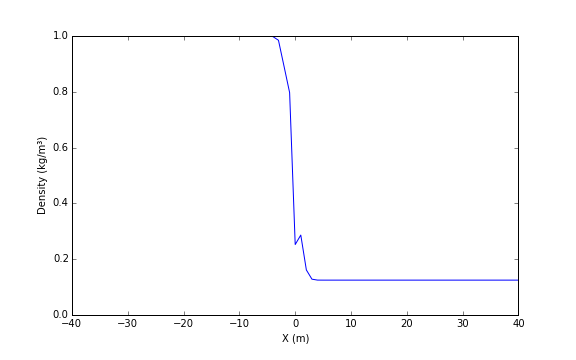
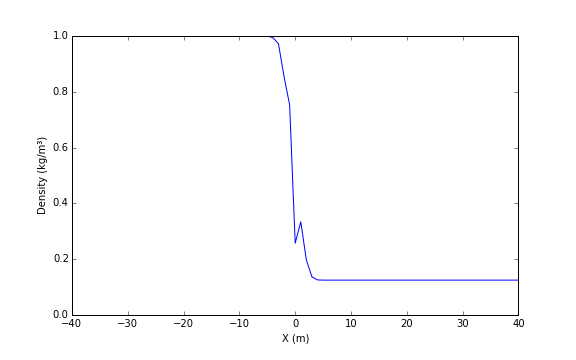
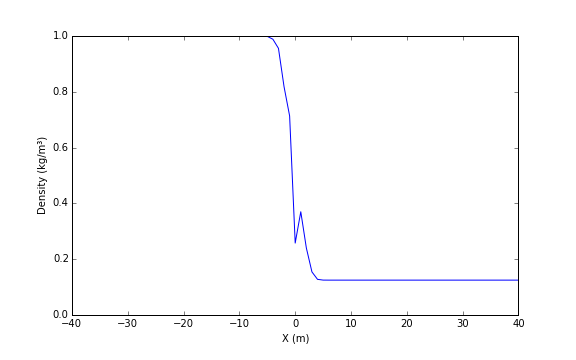
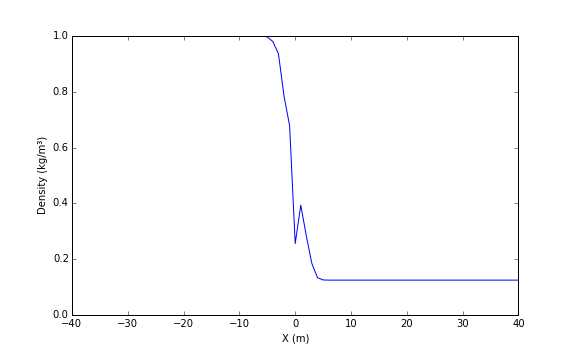
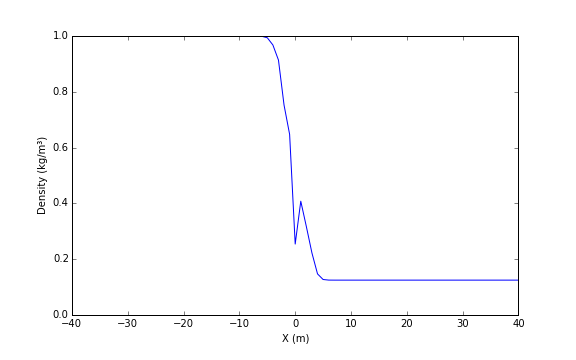
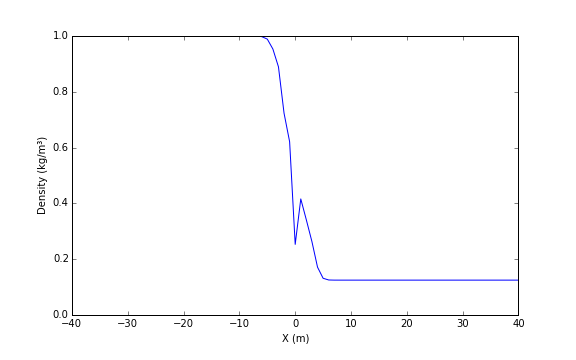
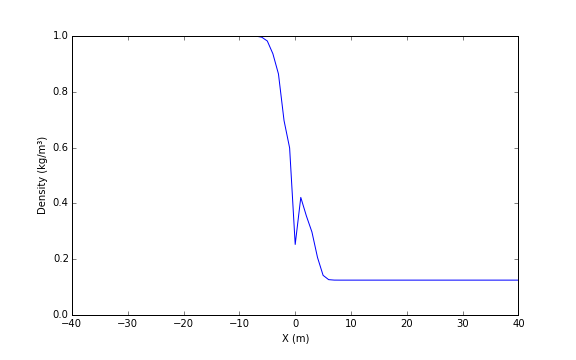
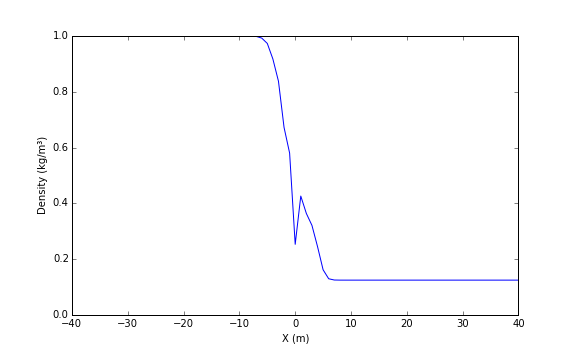
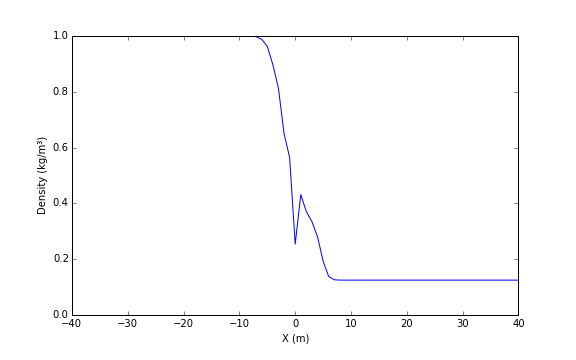
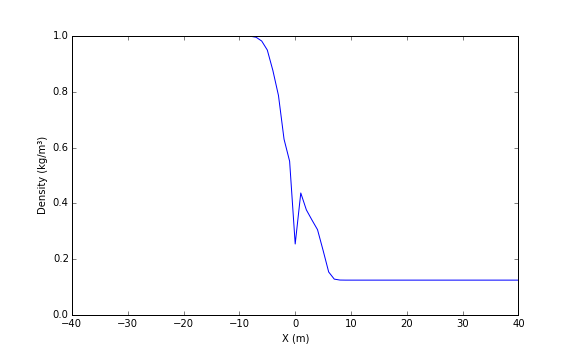
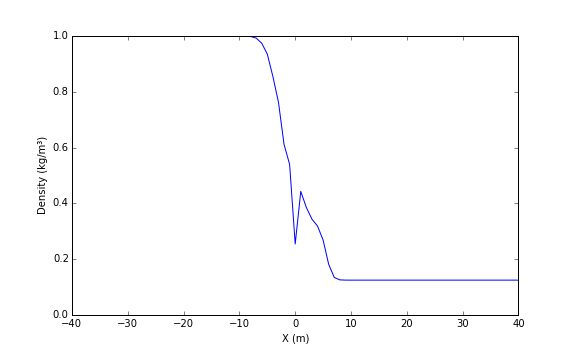
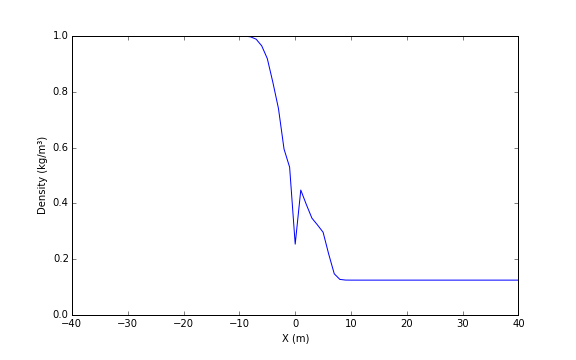
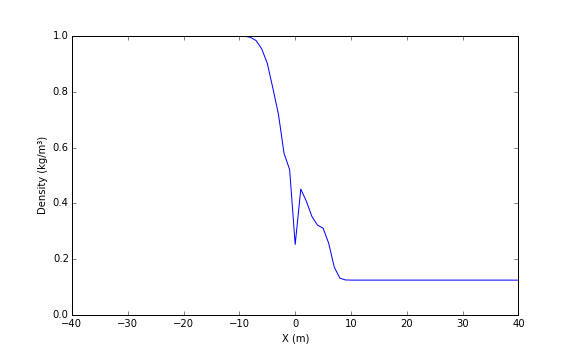
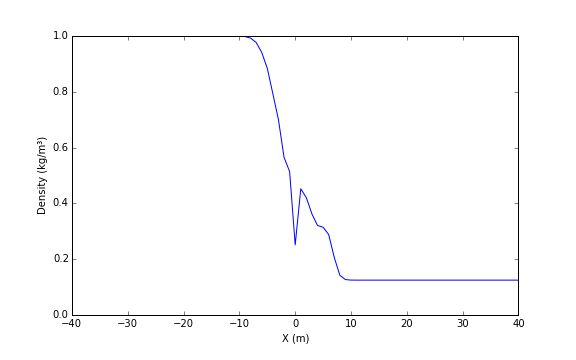
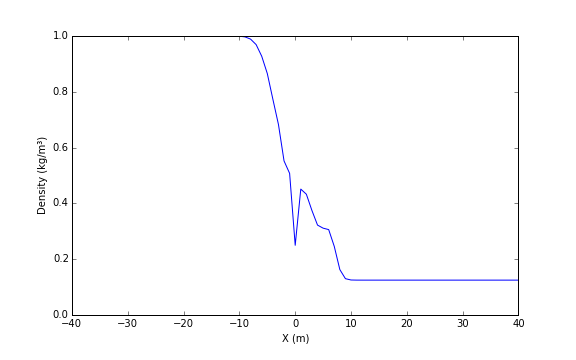
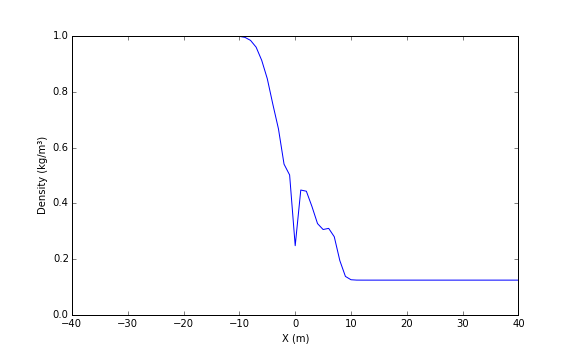
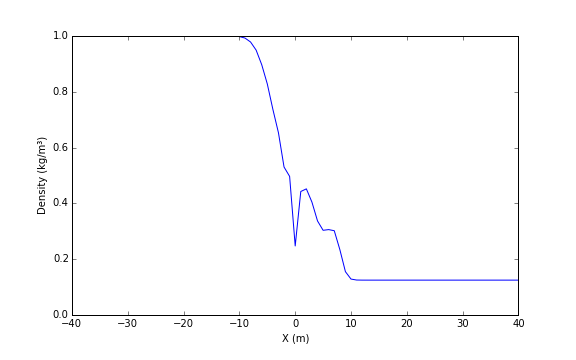
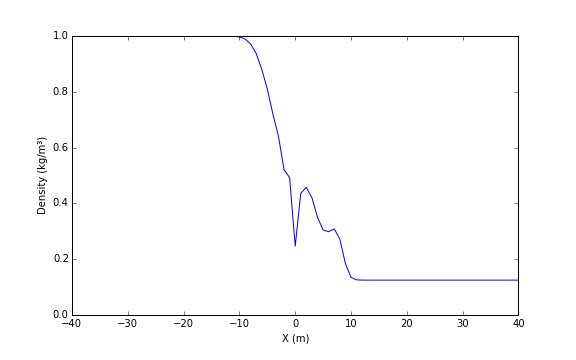
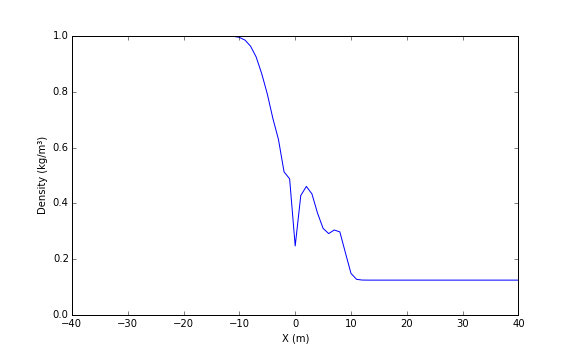
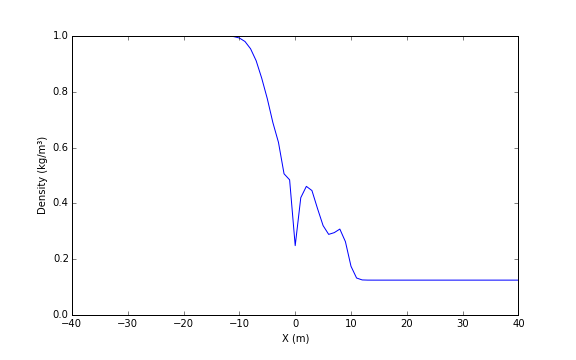
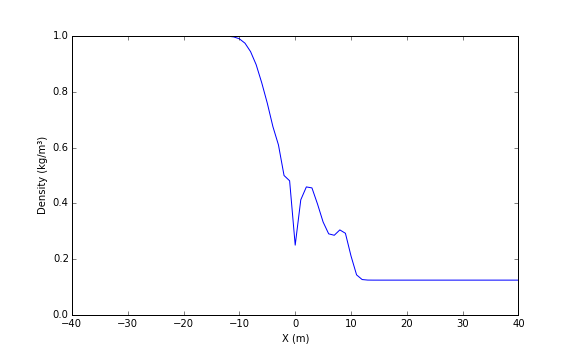
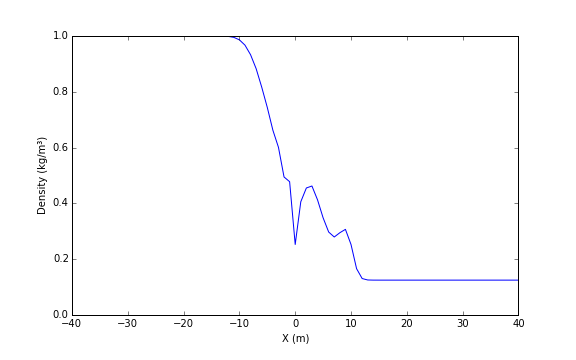
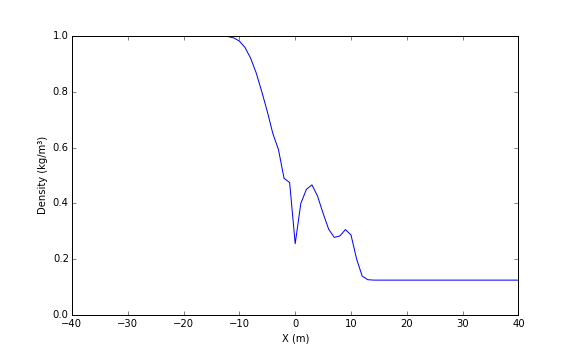
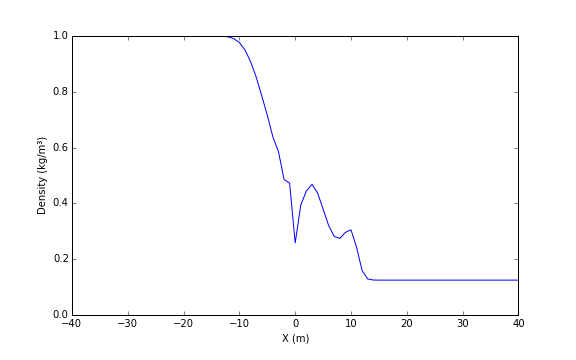
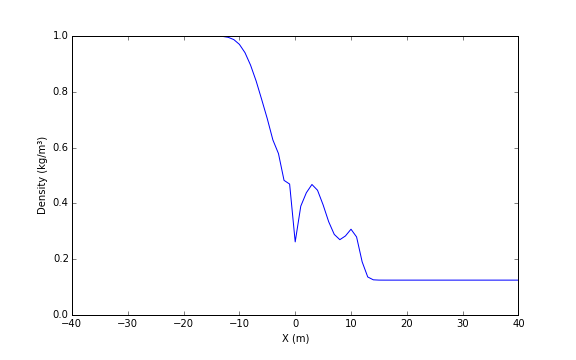
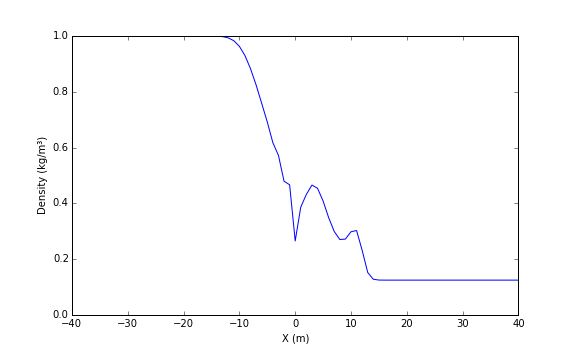
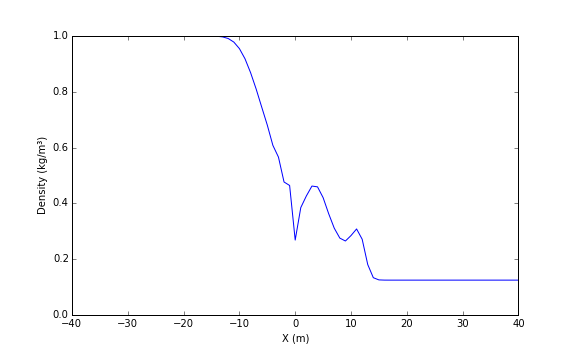
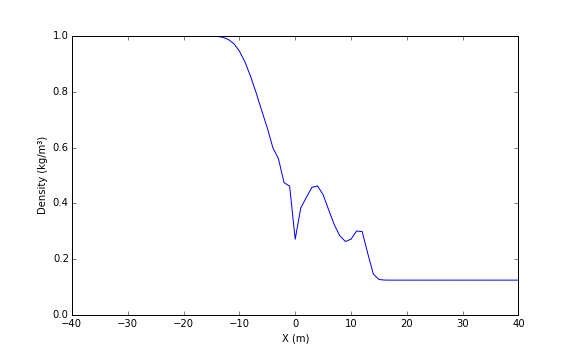
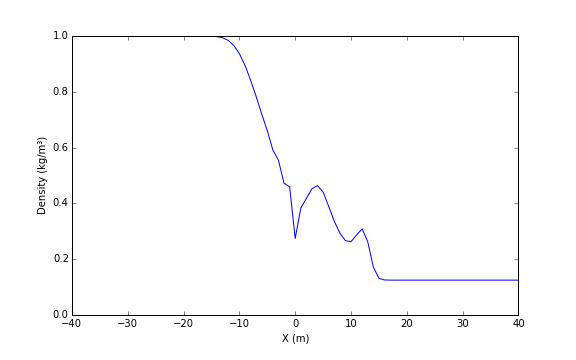
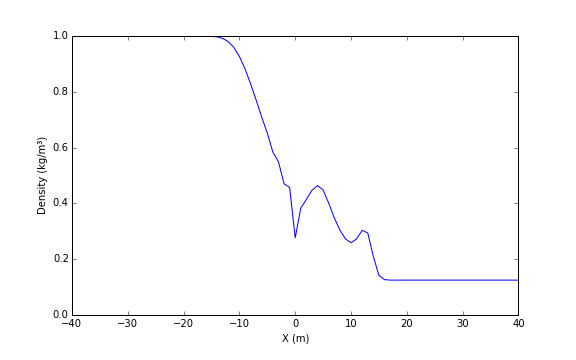
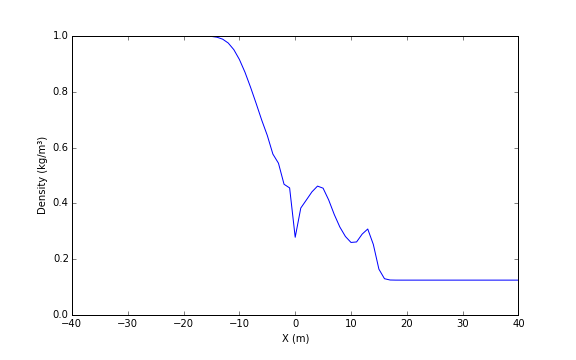
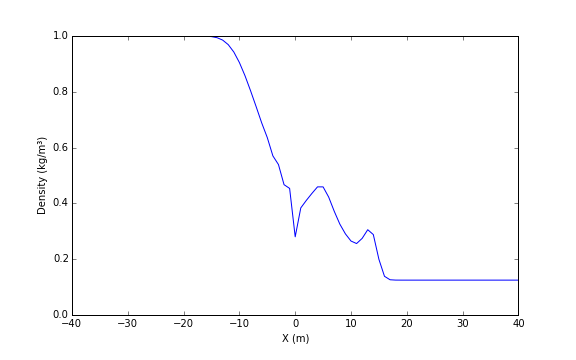
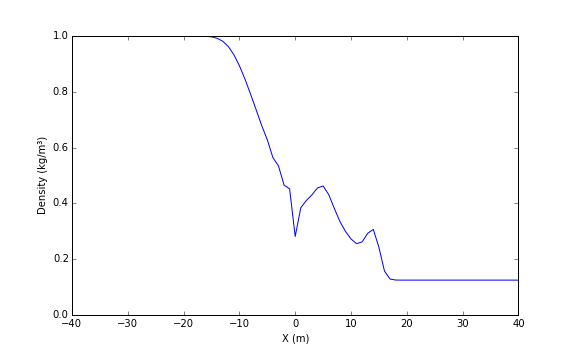
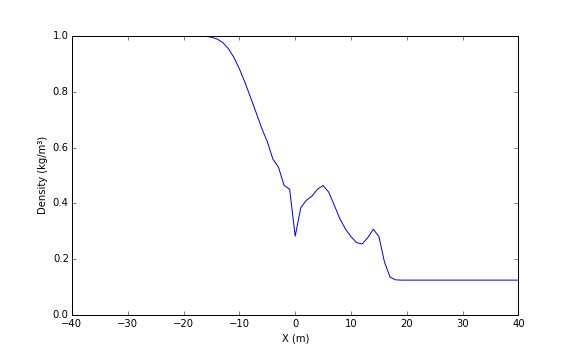
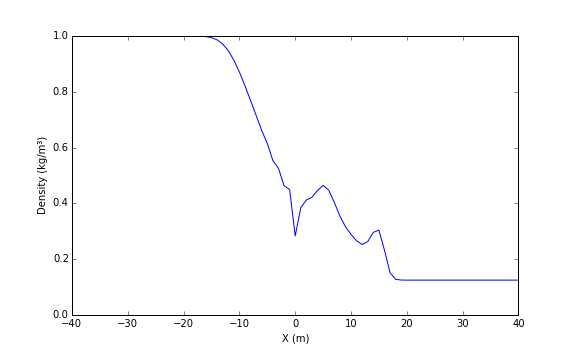
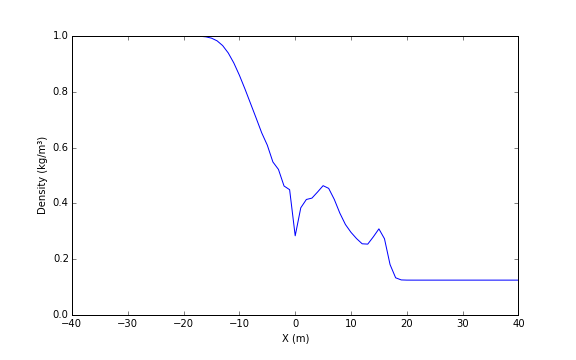
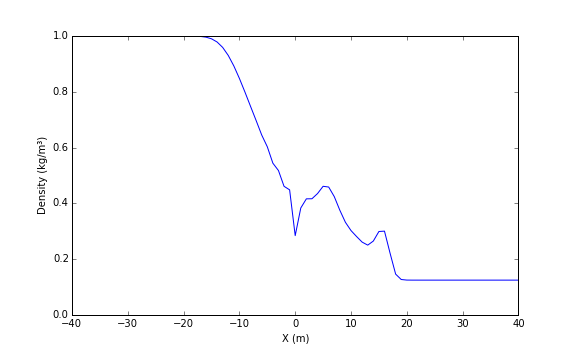
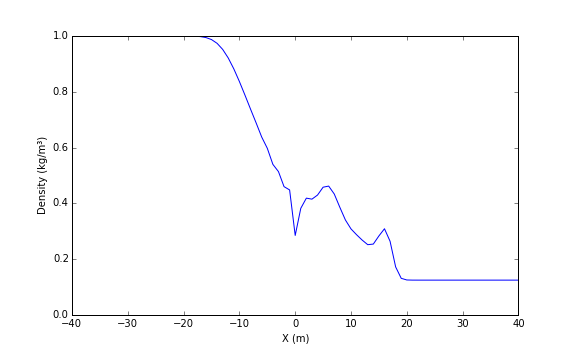
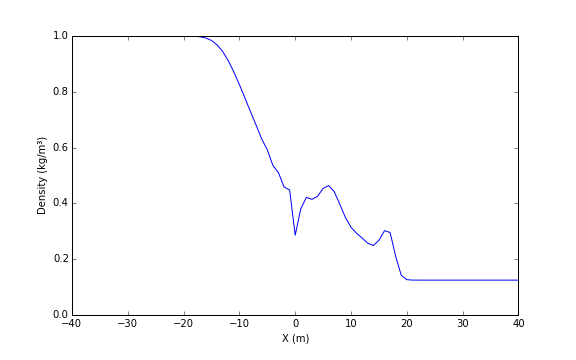
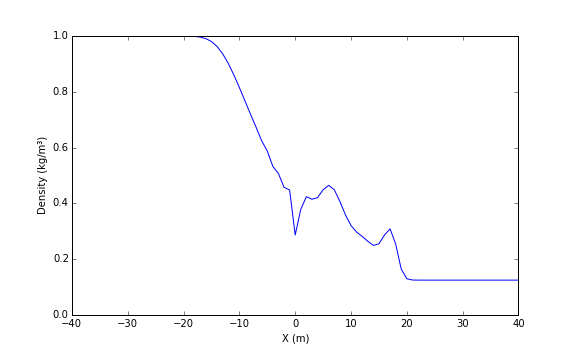
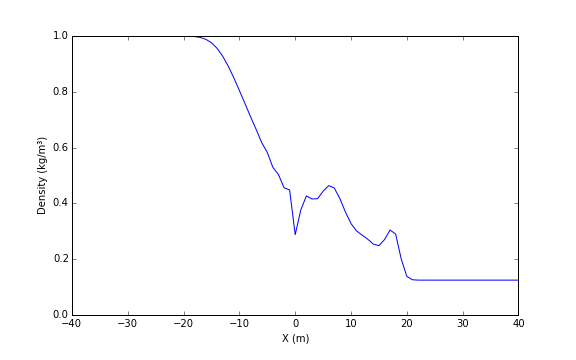
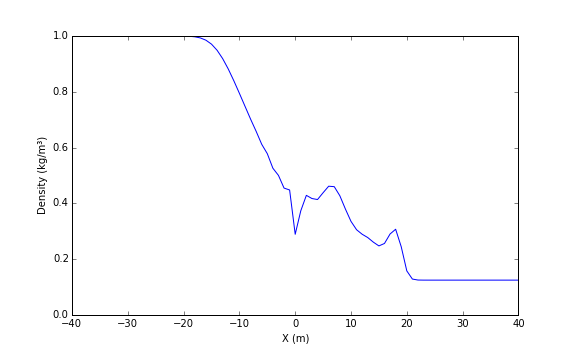
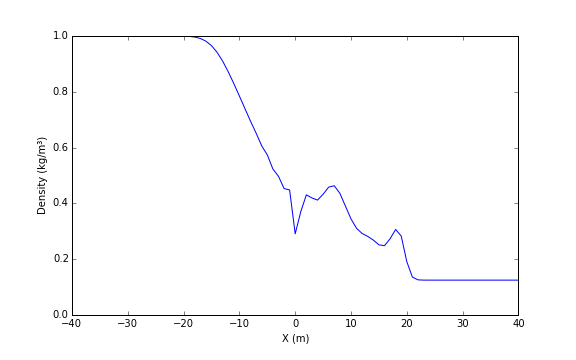
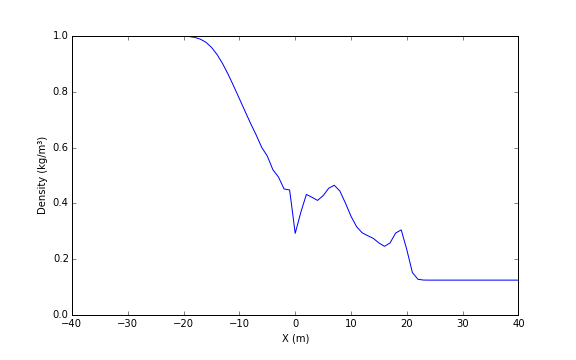
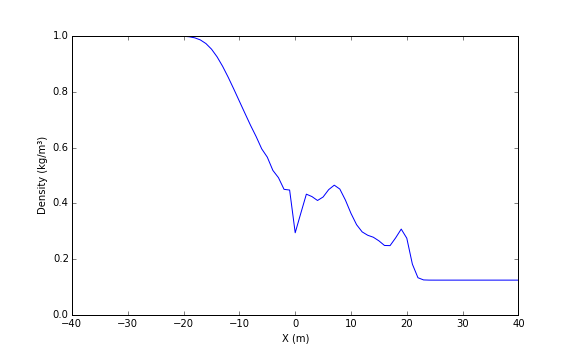
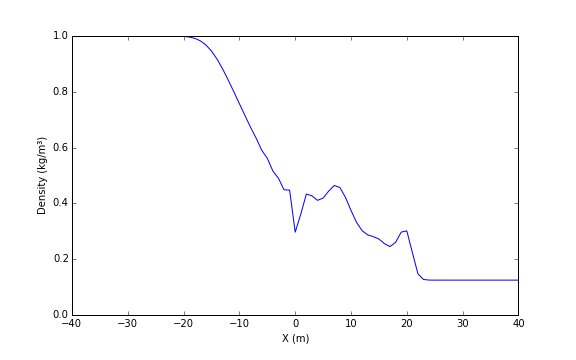
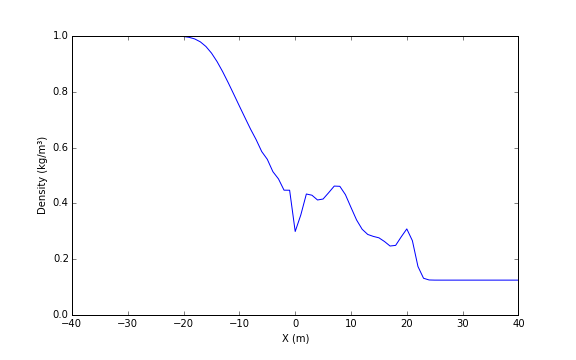
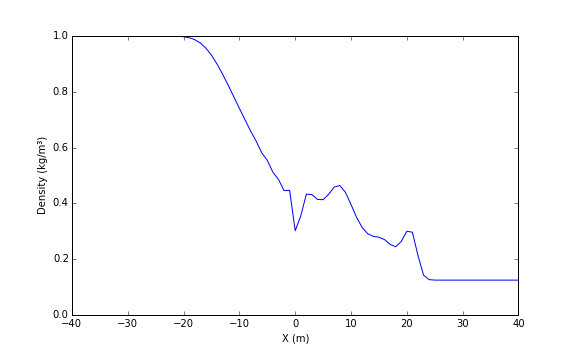
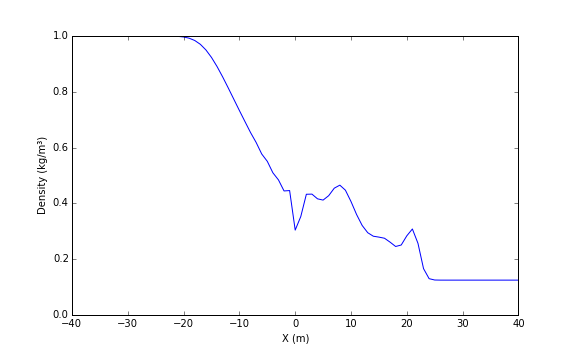
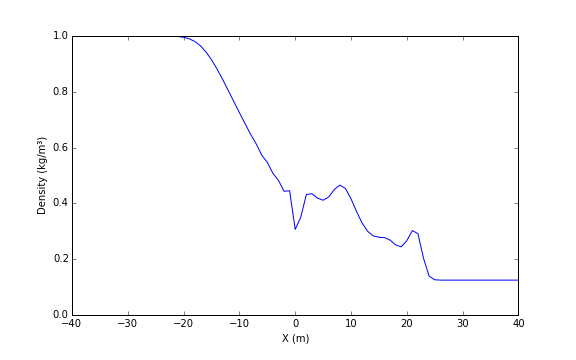
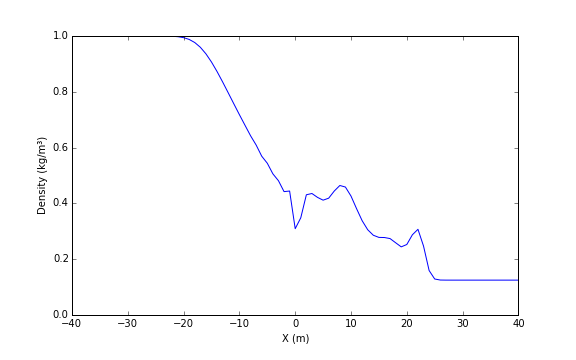
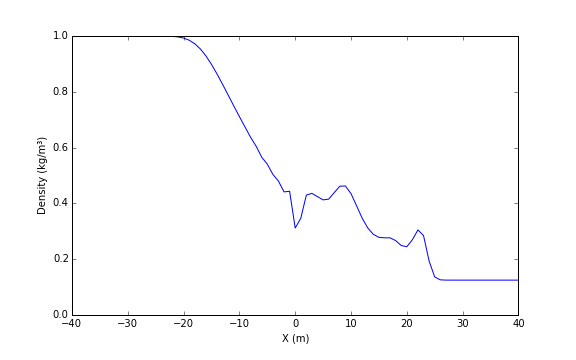
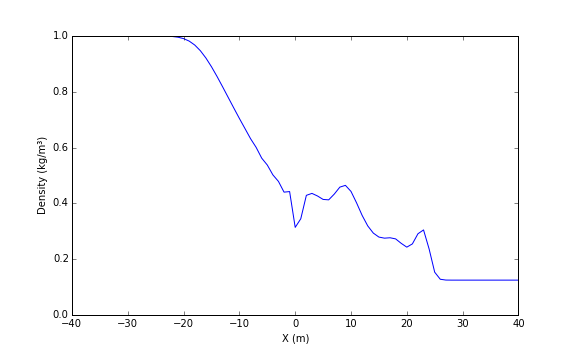
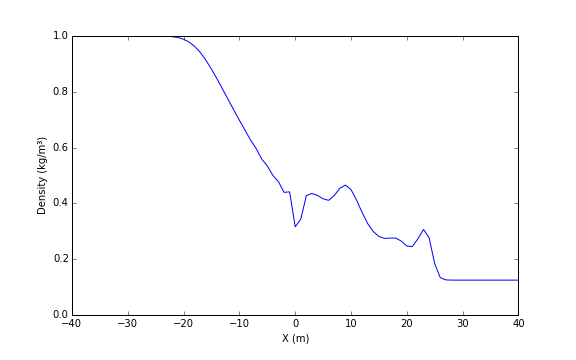
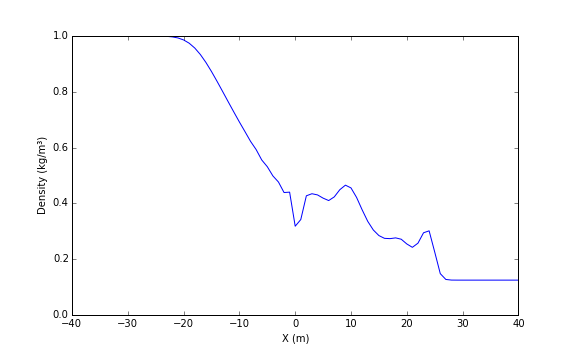
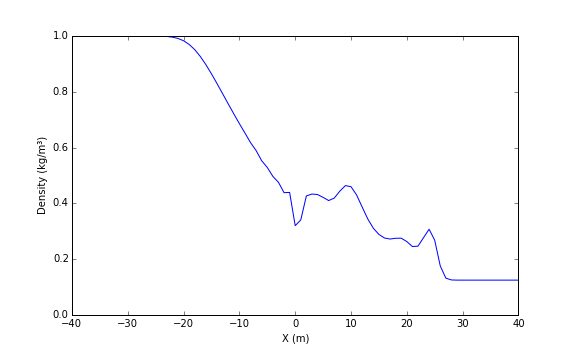
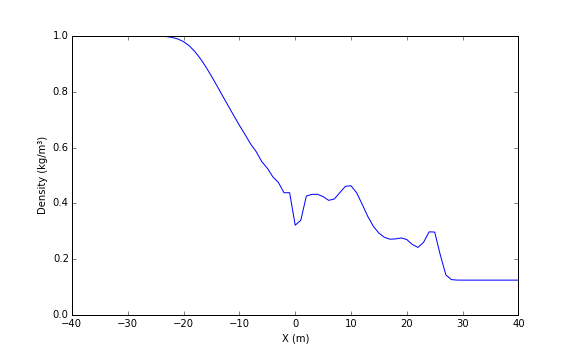
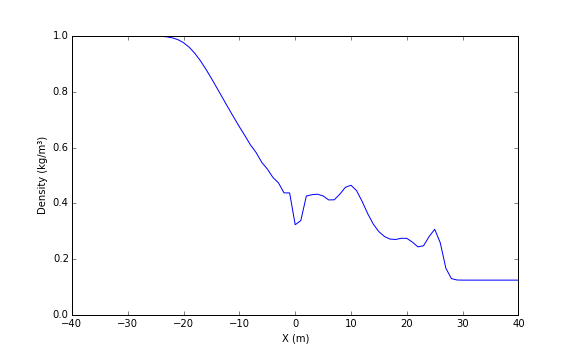
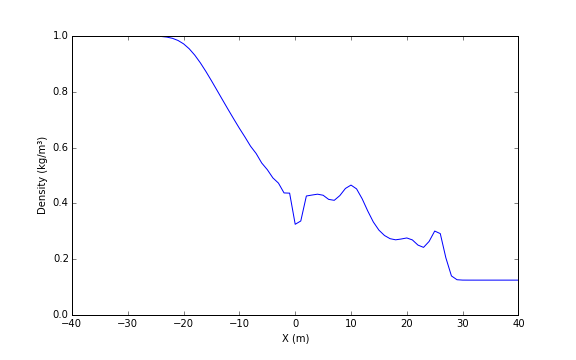
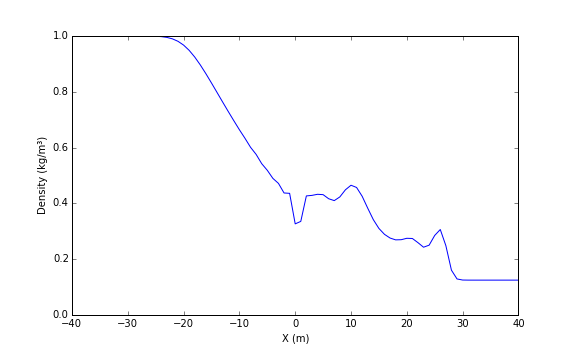
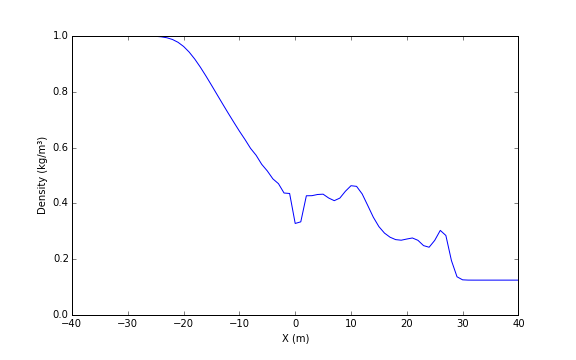
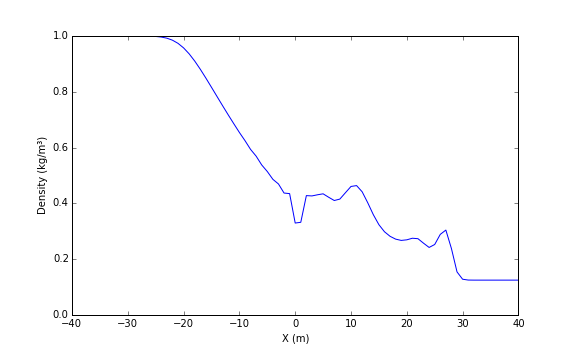
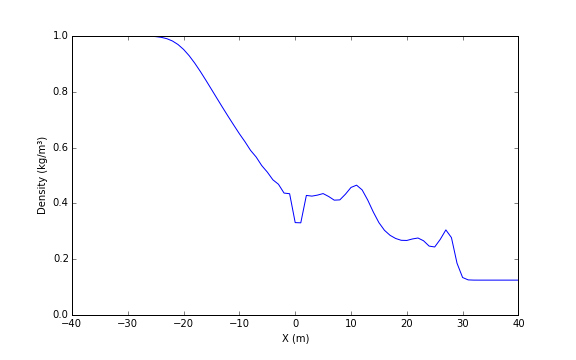
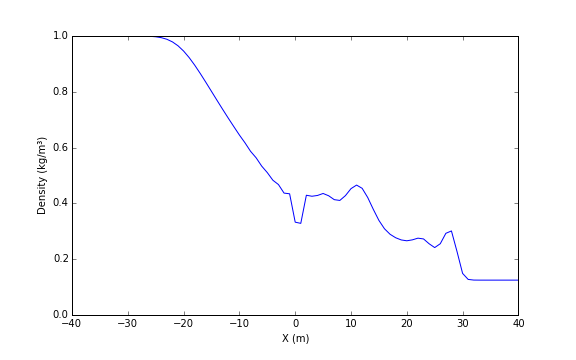
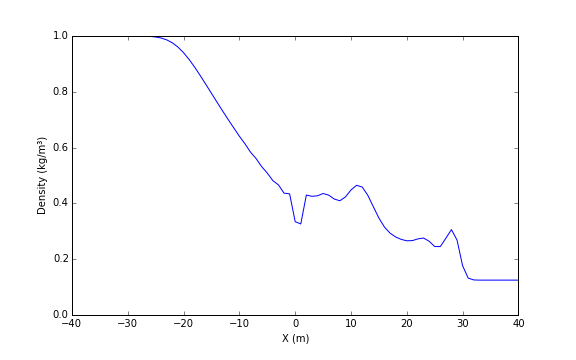
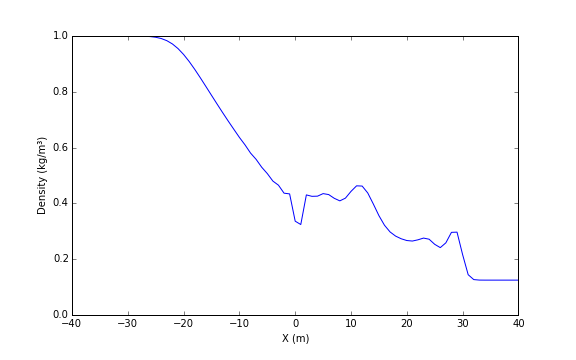
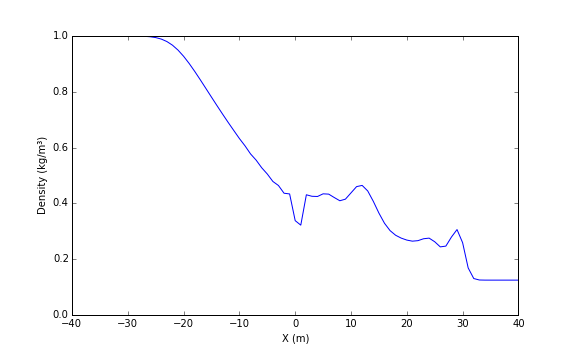
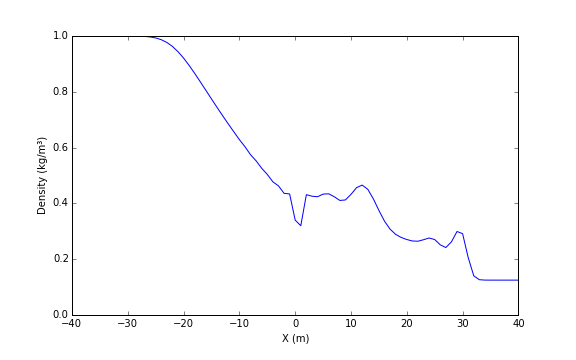
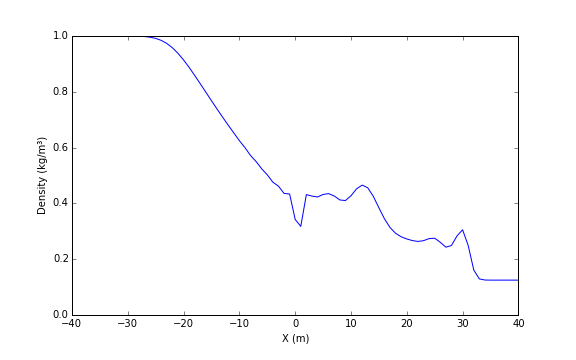
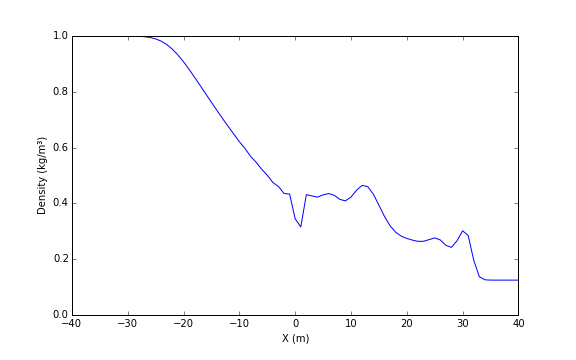
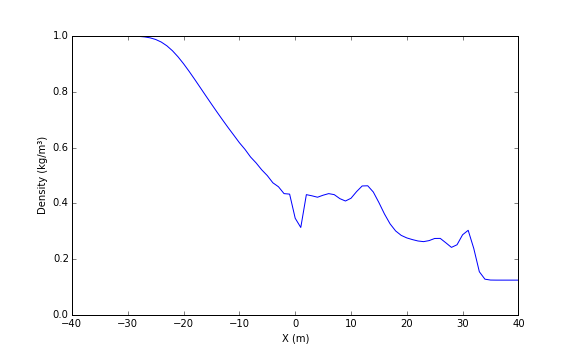
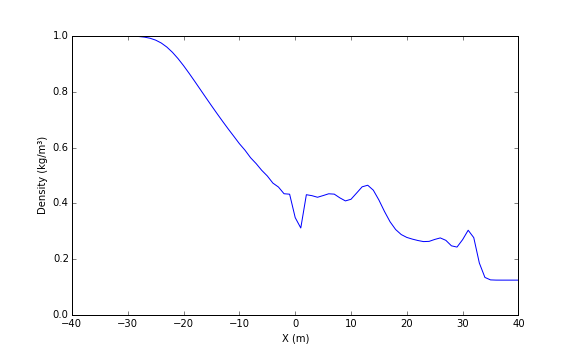
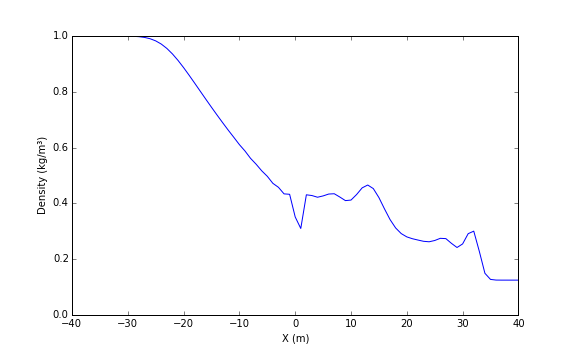
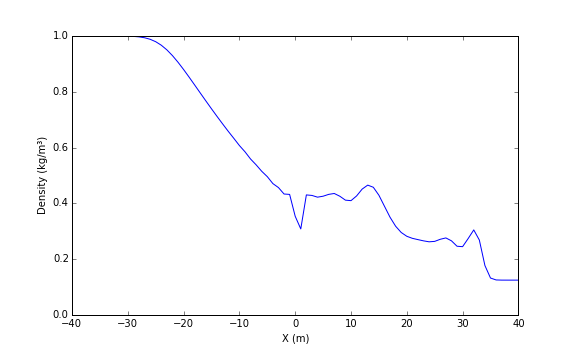
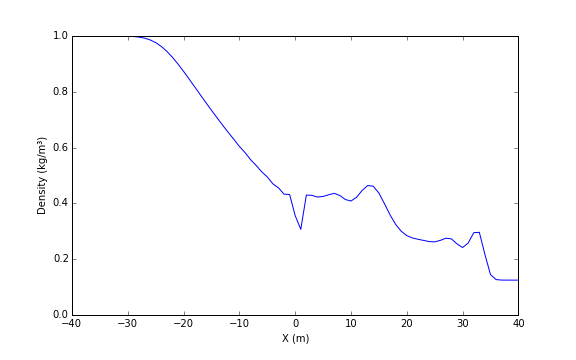
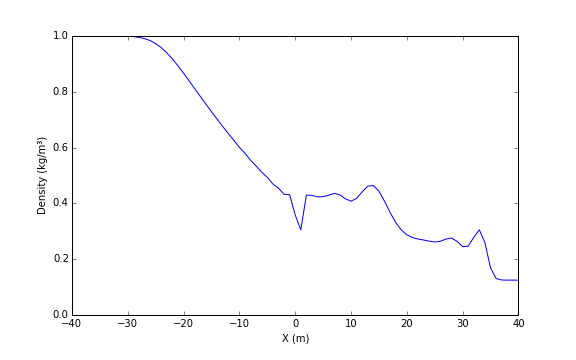
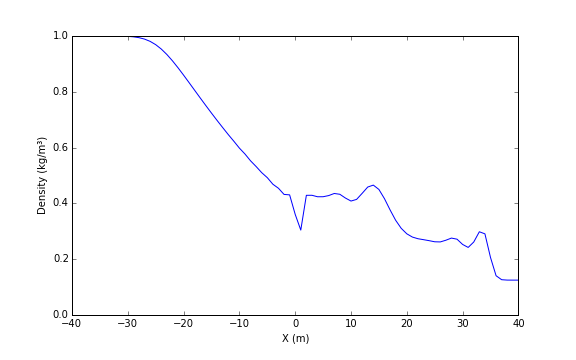
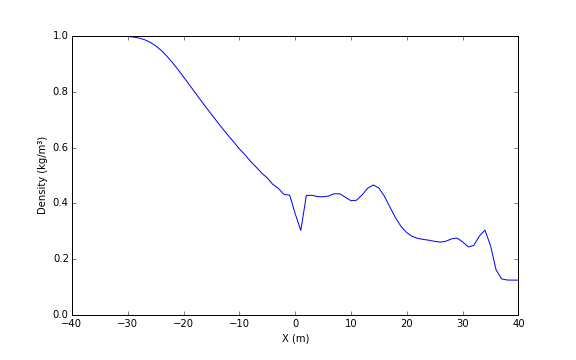
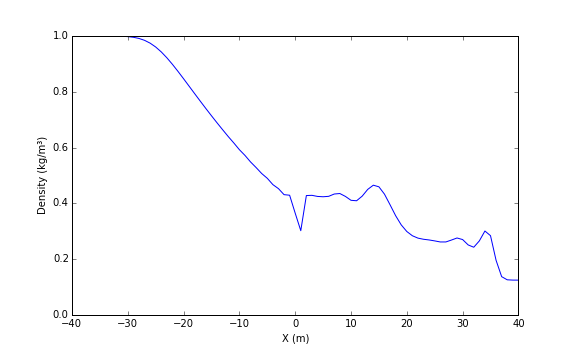
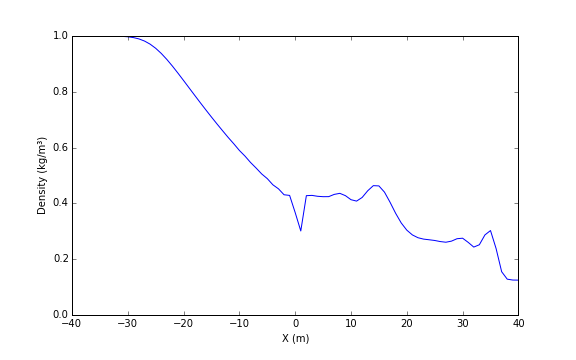
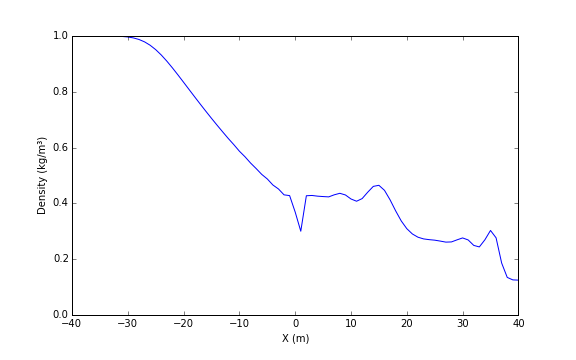
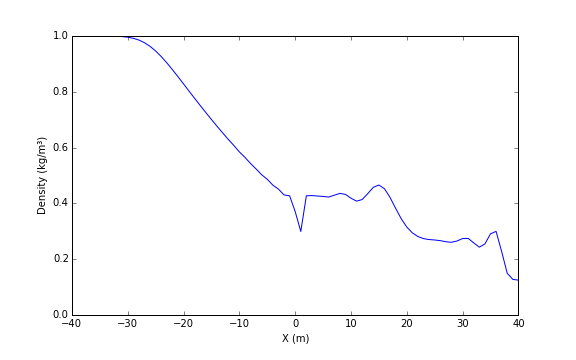
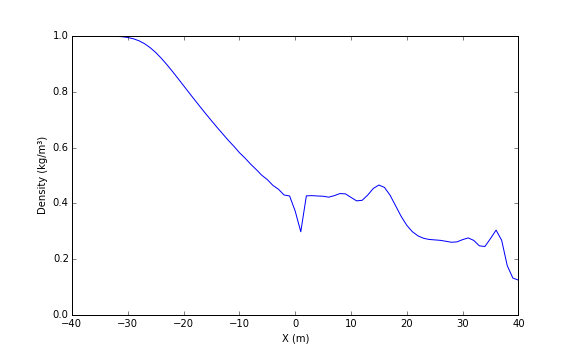
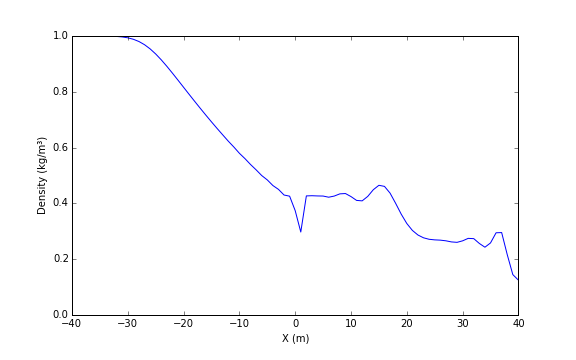
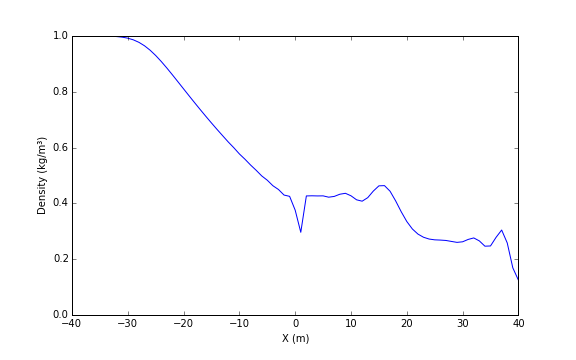
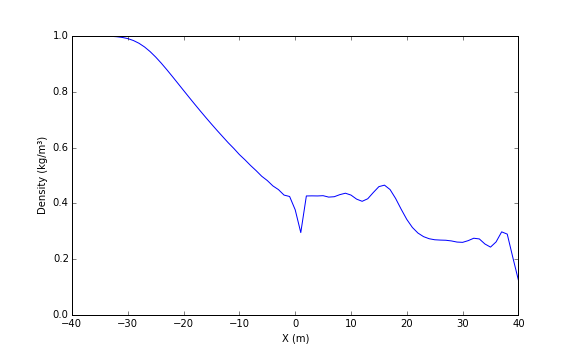
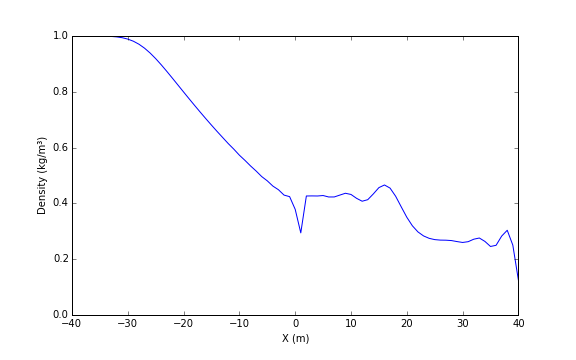
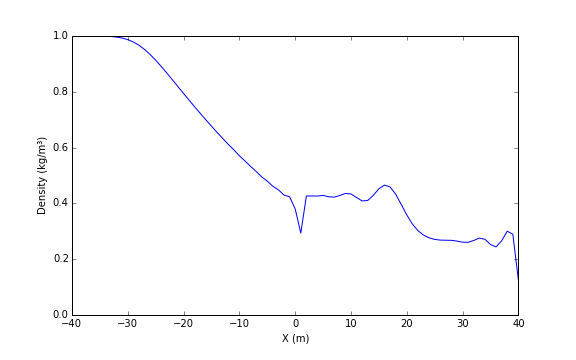
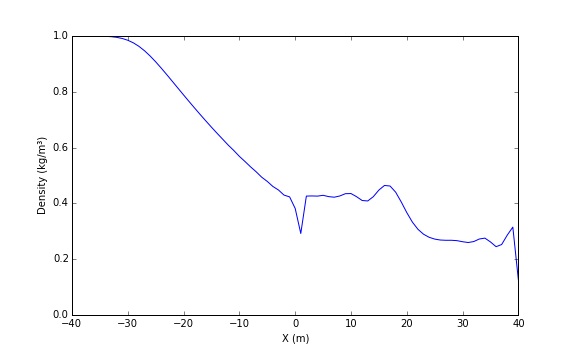
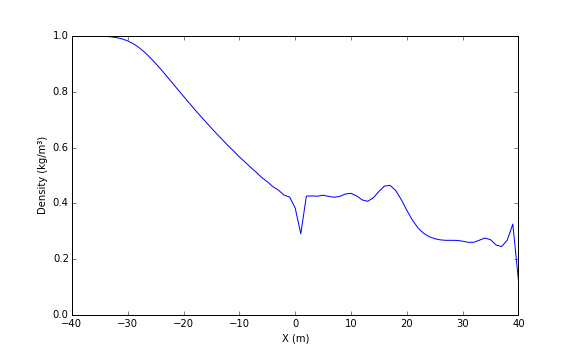
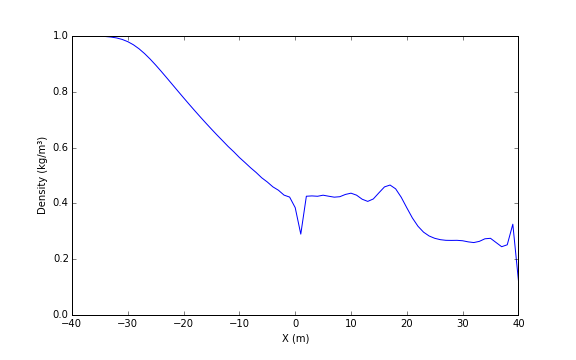
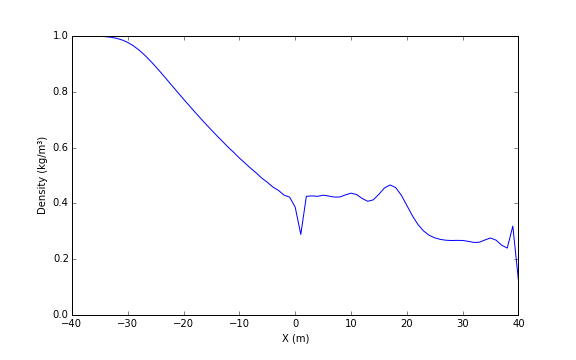
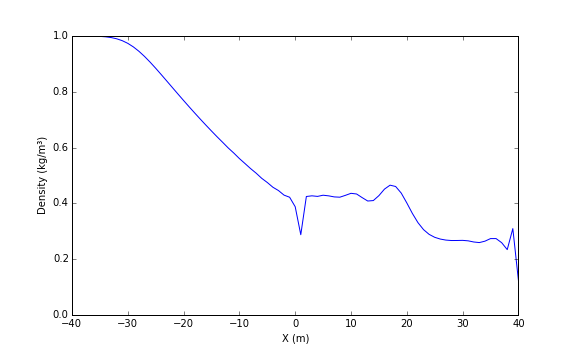
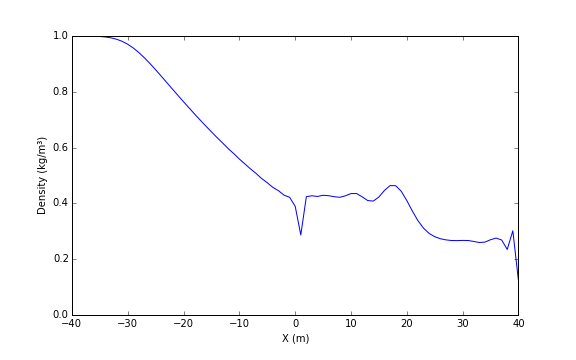
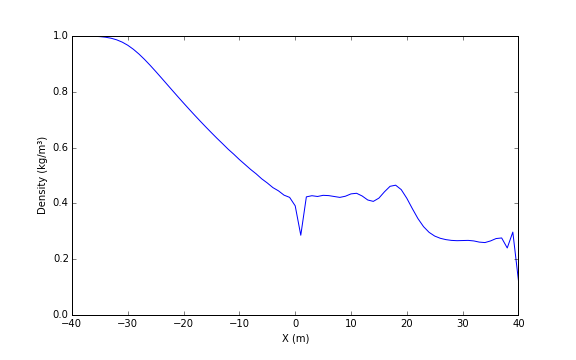
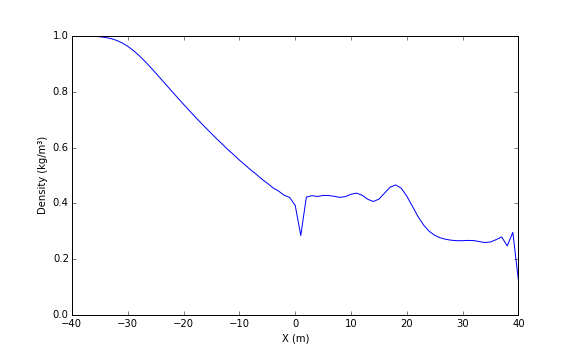
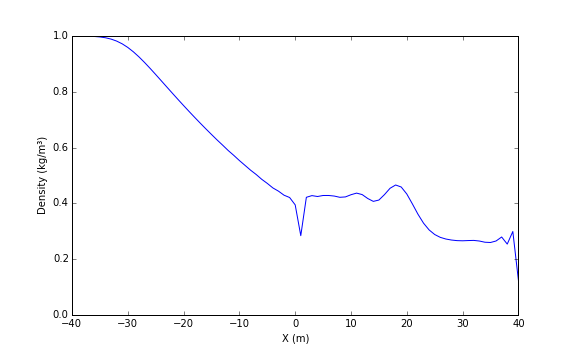
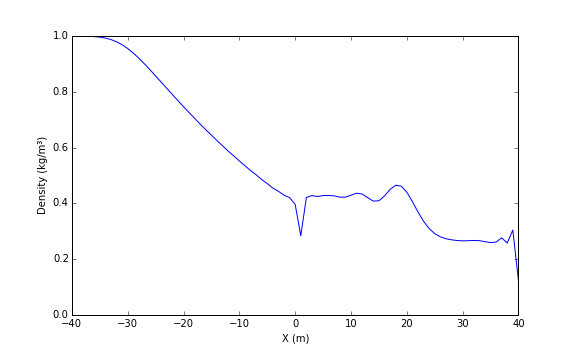
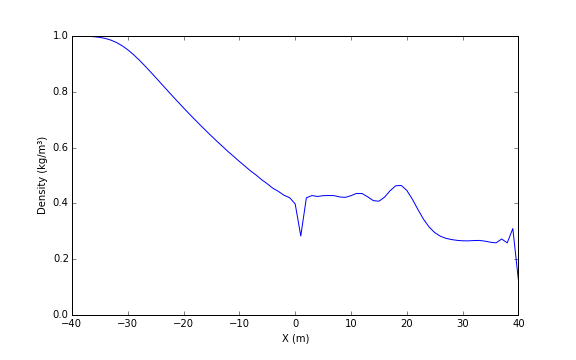
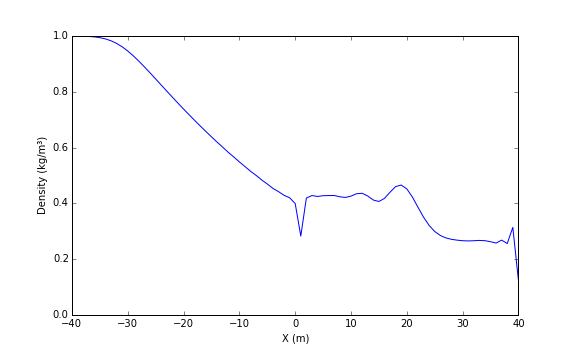
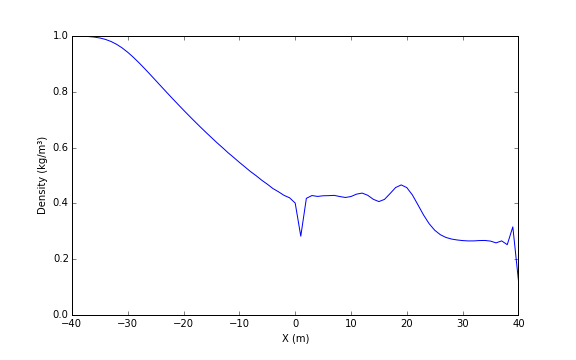
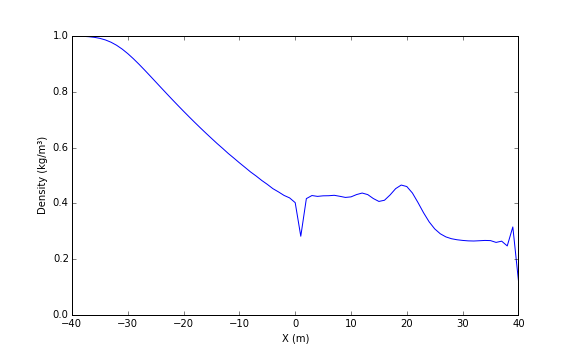
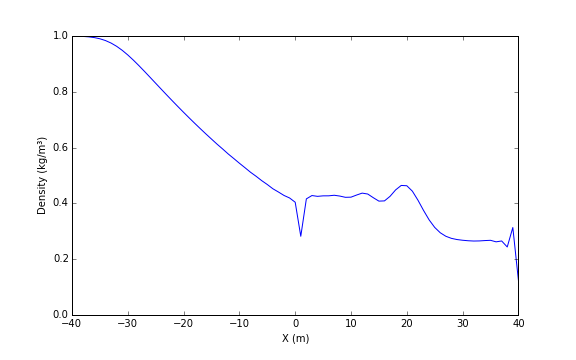
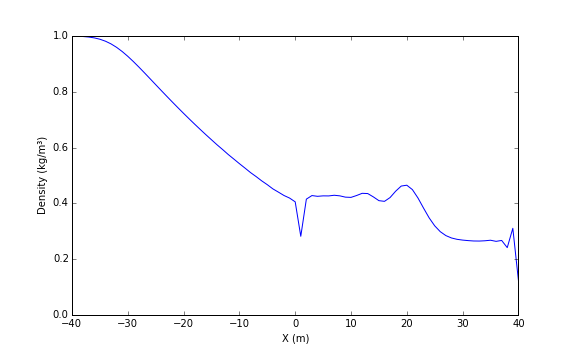
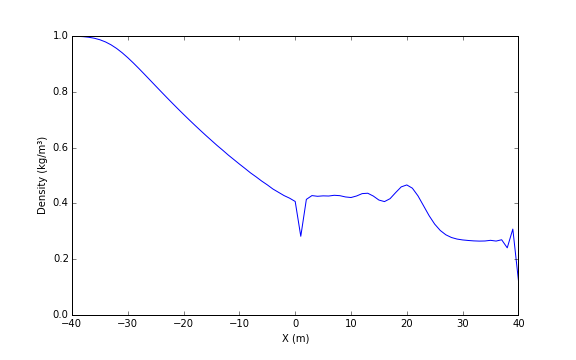
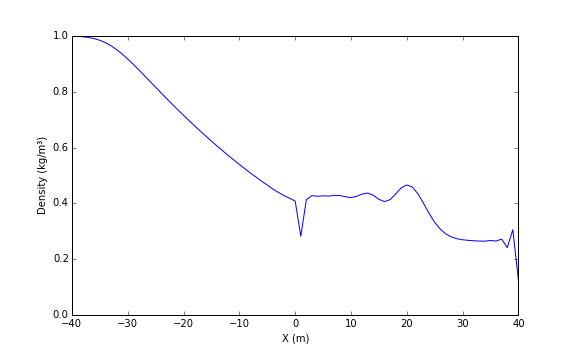
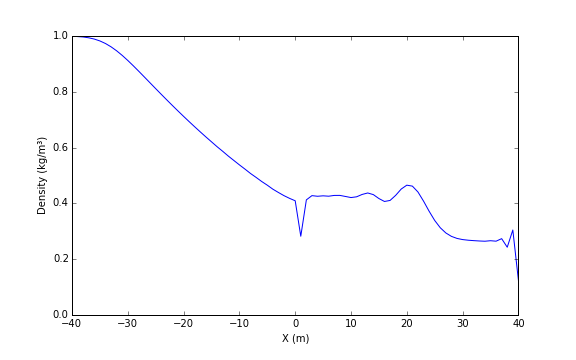
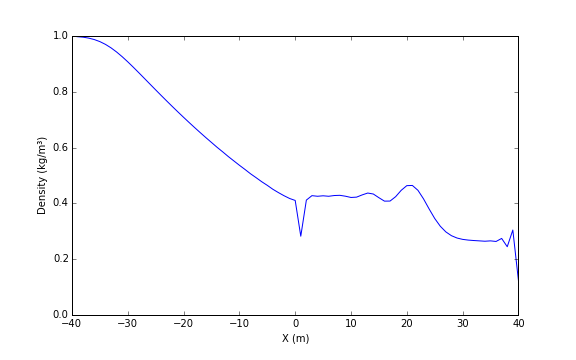
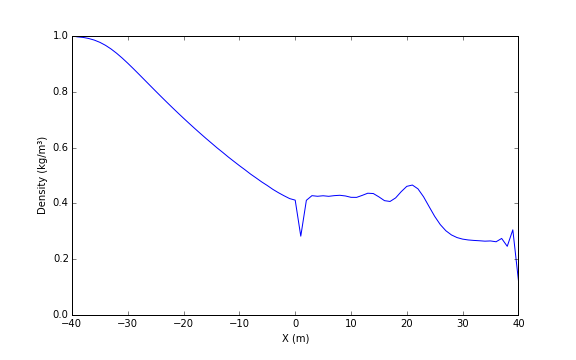
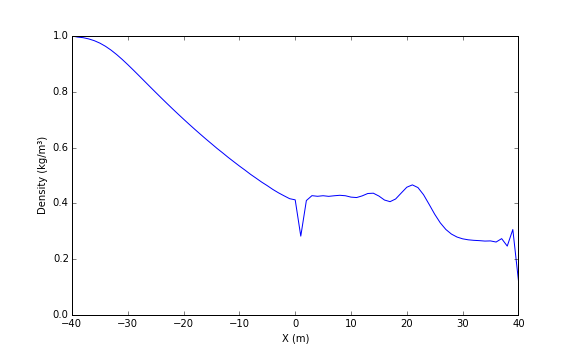
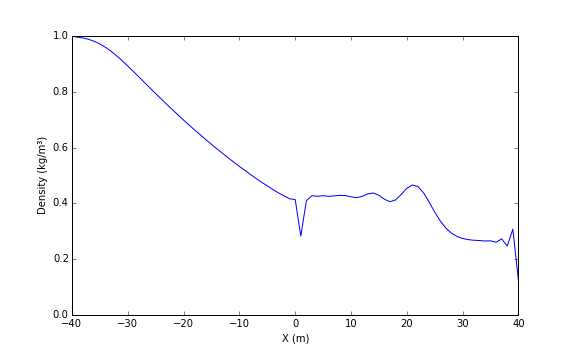
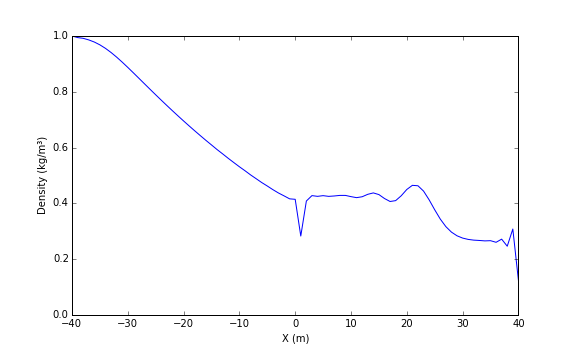
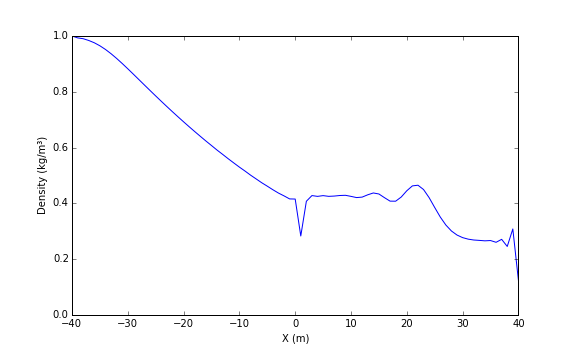
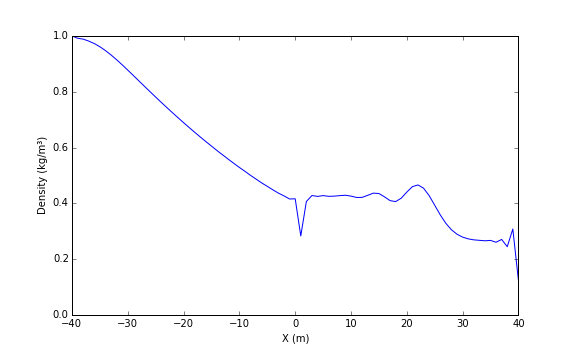
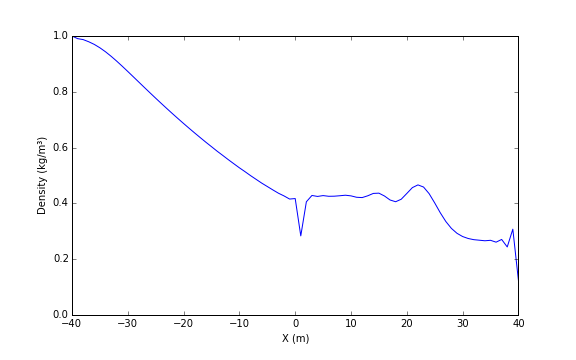
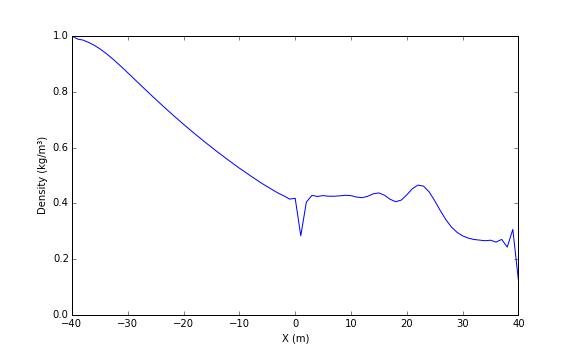
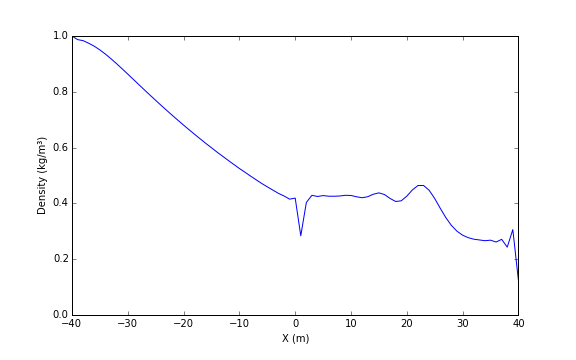
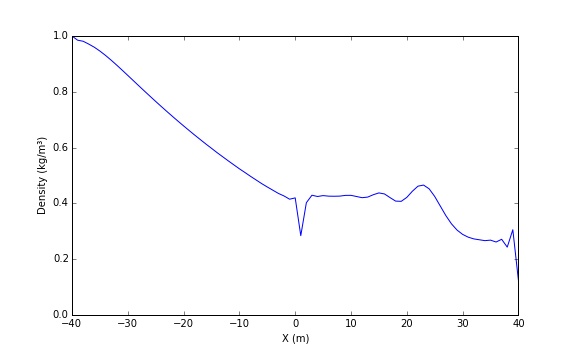
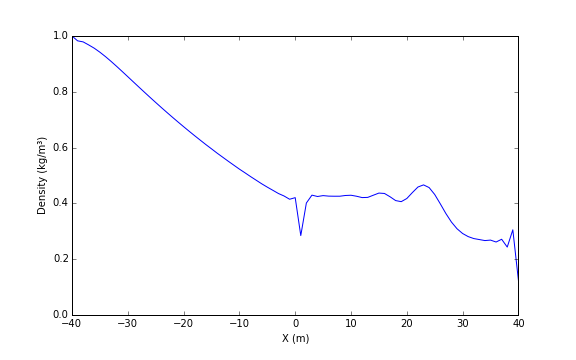
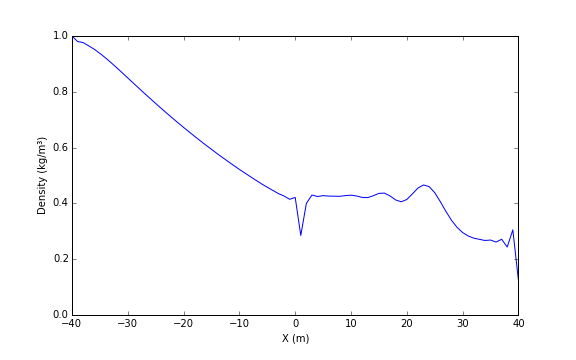
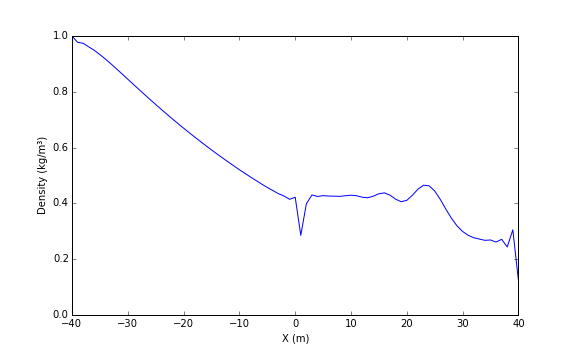

In [12]:
#nous utilisons des autres noms de variable pour éviter d'interférer si on relance une partie du notebook

tfbis = 0.025
nxbis = 321
Lbis = 80
u = ComputeInitialCondition(ICL,ICR,gamma,nx,Lbis)
Utot = SodsShock(u,tfbis,gamma,dt,nx,dx) 
rho = Utot[:,0,:]
visual(rho,nx,(0,1),"X (m)","Density (kg/m³)",Lbis)

On n'analysera que la densité pour ce dernier cas. On observe dans dans l'animation que la densité va après un temps assez grand essayer d'être la même partout, c'est la retour à l'équilibre therodynamique. Il est physiquement certain qu'au bout d'un temps infini la densité moyenne sera la même partout ainsi que la pression et la vistesse sera à nouveau nulle pour satisfaire le nouvel équilibre. Mais la simulation a ses limites, on ne peut pas aller aussi loin que l'on veut. 

On voit aussi une autre erreur numérique: le creu en x = 0 qui n'as pas de sens physique. Il y a l'effet des oscillations numériques qui vient ici compliquer l'analyse physique.

Enfin, on observe bien la propagation de deux ondes représentative du problème. Le première est l'onde se déplaçant vers la droite qui est l'onde de choc. On la reconnait à sa pente élevé et qui varie peu sur la simulation. Et la seconde est une onde se propageant vers la gauche et represente la diminution progressive de la pression. C'est l'onde d'expansion.  

## Conclusion:

Le tube à choc proposé par Sod est donc un problème très simple permettant de voir les limitations d'une méthode numérique car ce dernier est soluble analytiquement, c'est un problème de Riemann. On voit par ailleurs que la méthode de Richtmyer possède des limitations, elle ne modélise pas bien les chocs, points de discontinuité, par contre, elle est correcte pour les points de continuité. Pour modéliser de manière exacte le phénomène dans le tube, il faudrait développer une autre méthode qui possèderait un ordre de grandeur d'erreur plus faible.

L'ordre 1 n'est pas conseillé dans ce type de problème car il est trop dispersif et lisserait donc trop le choc.

Pourquoi ne pas penser à une méthode d'ordre supérieur . Dans la littérature il est aussi question d'additionner de la diffusion numérique (mentionnée comme " artificial viscosity " dans le livre Finite Volume Methods for Hyperbolic Problems de Randall J. LeVeque).